In [1]:
# Built-in packages
import json

# Third party packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Charting options
sns.set(context= "notebook", color_codes=True)
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\\Users\\Gangadar Reddy\\Desktop\\heart_failure_dataset.csv")
col_names = df.columns[:-1]
target_col = ["DEATH_EVENT"]
num_cols = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets" , "serum_creatinine", "serum_sodium" , "time"]
bin_cols = ["high_blood_pressure", "sex", "smoking", "anaemia", "diabetes"]
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Check if any of the columns have null values
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:
#distribution of data
df_summary = df.describe()
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
import seaborn as sns


In [7]:
import matplotlib.pyplot as plt


In [8]:
from imblearn.over_sampling import SMOTE


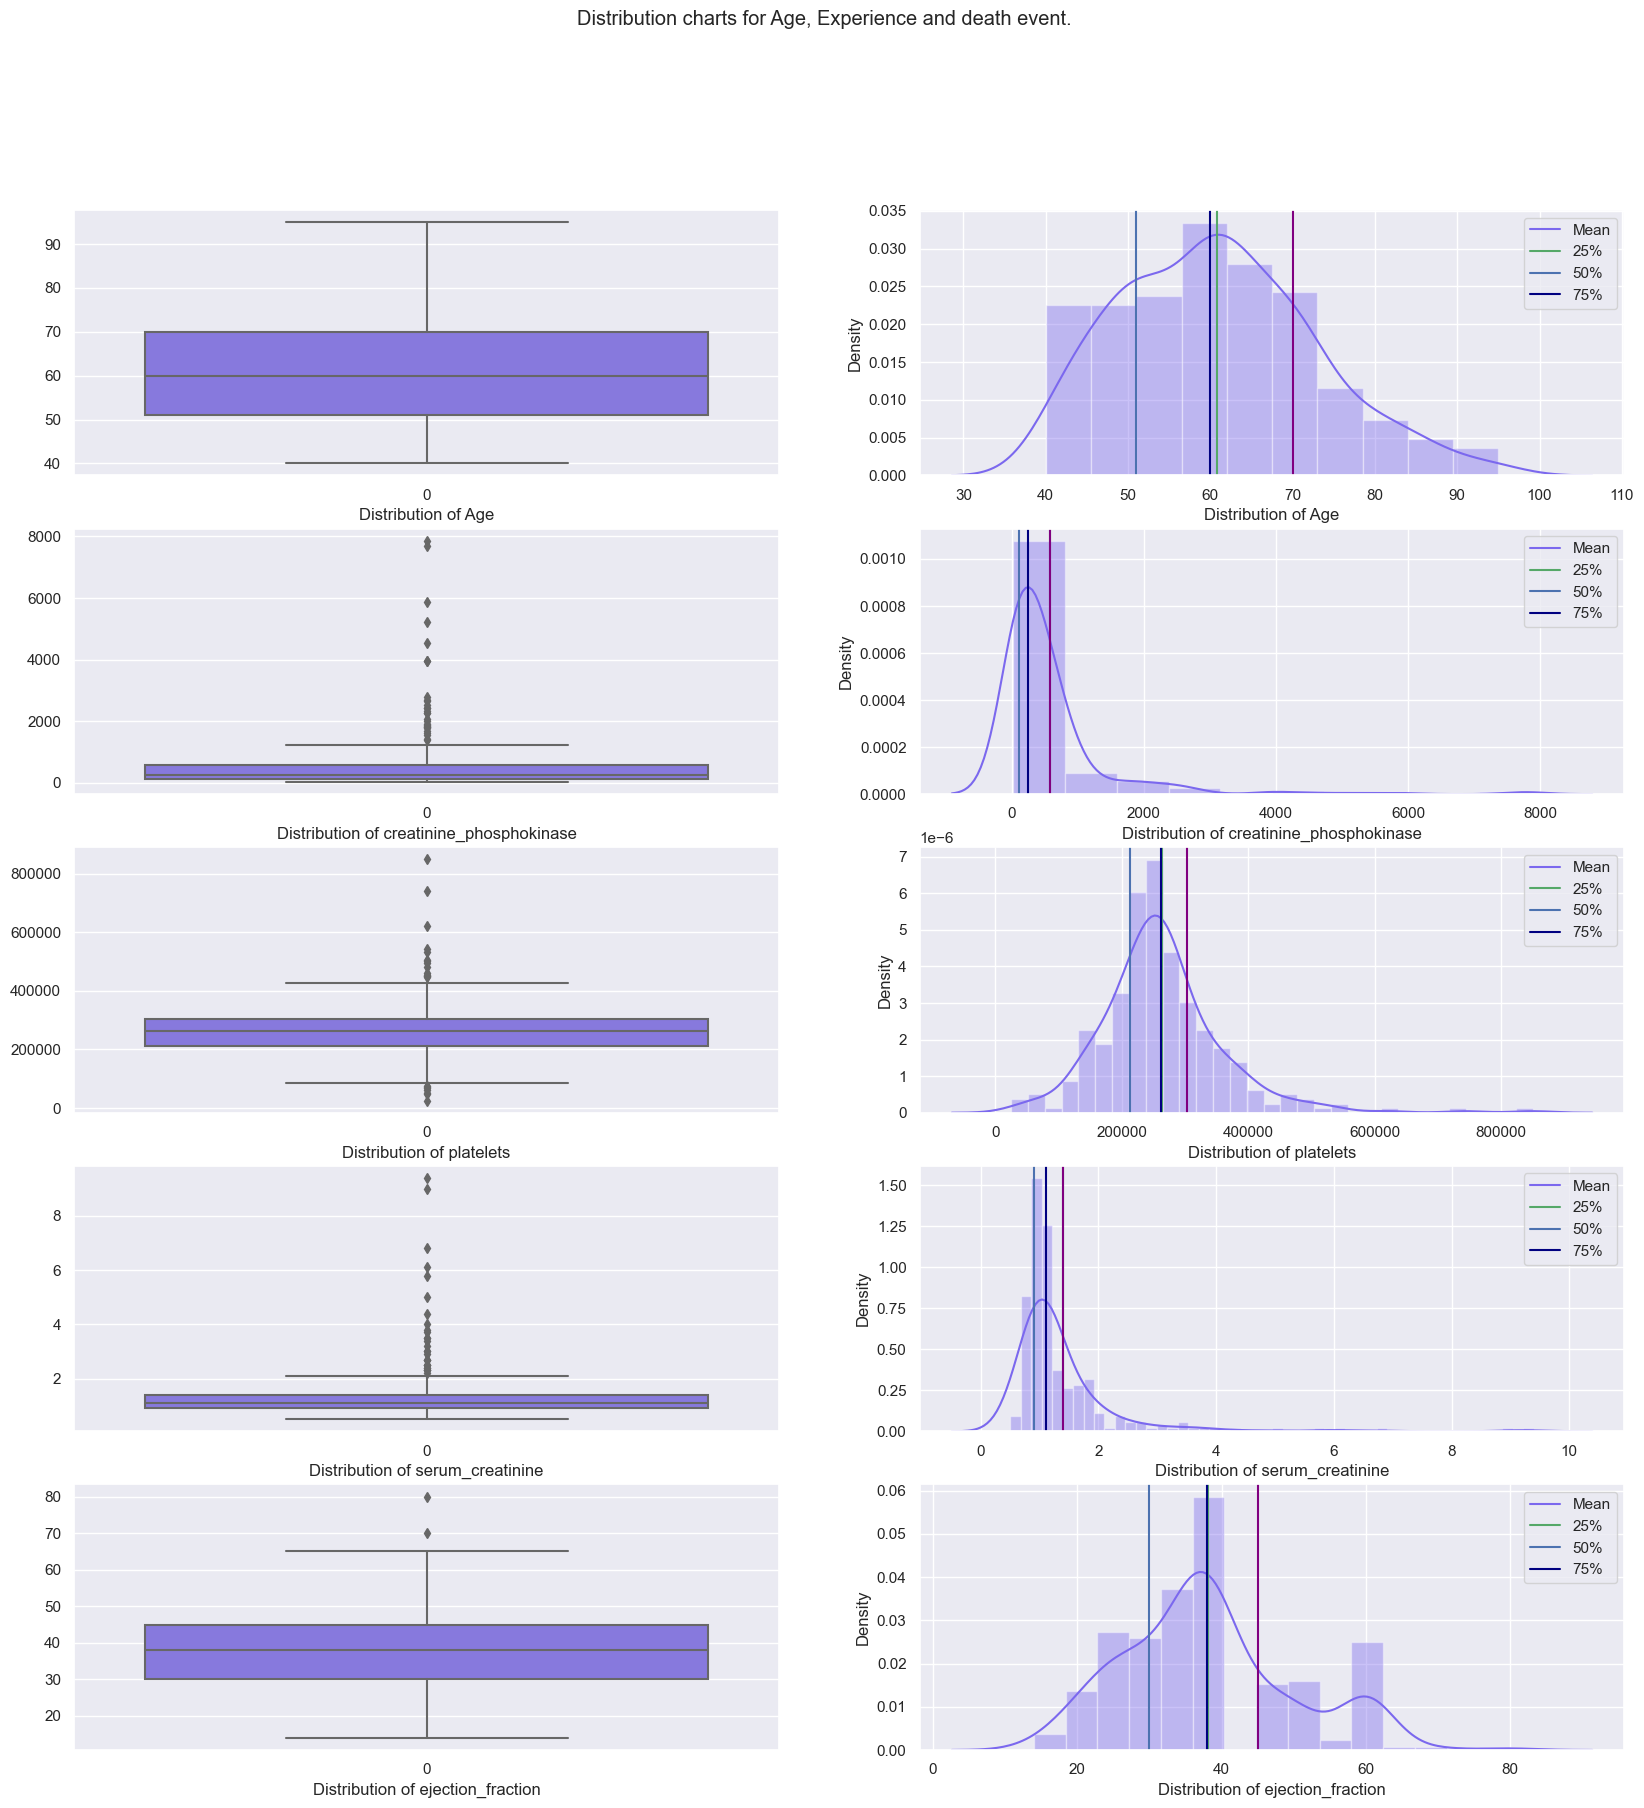

In [9]:
#data visualisation
import warnings
warnings.filterwarnings('ignore')
def draw_axvlines(plt, col):

    mean = df_summary.loc["mean", col]
    q1 = df_summary.loc["25%", col]
    q2 = df_summary.loc["50%", col]
    q3 = df_summary.loc["75%", col]
    plt.axvline(mean, color = "g");              # Plotting a line to mark the mean 
    plt.axvline(q1, color = "b");                # Plotting a line to mark Q1 
    plt.axvline(q2, color = "navy");             # Plotting a line to mark Q2 
    plt.axvline(q3, color = "purple");           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(5, 2, figsize = (20,20));
fig.suptitle('Distribution charts for Age, Experience and death event.');


# Create boxplot to show distribution of Age
sns.boxplot(df["age"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(x=df["age"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "age");


# Create boxplot to show distribution of creatinine_phosphokinase
sns.boxplot(df["creatinine_phosphokinase"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of creatinine_phosphokinase');

pp = sns.distplot(x=df["creatinine_phosphokinase"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of creatinine_phosphokinase');
draw_axvlines(pp, "creatinine_phosphokinase")


# Create boxplot to show distribution of platelets
sns.boxplot(df["platelets"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of platelets');

pp = sns.distplot(x=df["platelets"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of platelets');
draw_axvlines(pp, "platelets")


# Create boxplot to show distribution of serum_creatinine
sns.boxplot(df["serum_creatinine"], ax = axes[3][0], color = "mediumslateblue");
axes[3][0].set(xlabel = 'Distribution of serum_creatinine');

pp = sns.distplot(x=df["serum_creatinine"], ax = axes[3][1], color = "mediumslateblue");
axes[3][1].set(xlabel = 'Distribution of serum_creatinine');
draw_axvlines(pp, "serum_creatinine")

# Create boxplot to show distribution of ejection_fraction
sns.boxplot(df["ejection_fraction"], ax = axes[4][0], color = "mediumslateblue");
axes[4][0].set(xlabel = 'Distribution of ejection_fraction');

pp = sns.distplot(df["ejection_fraction"], ax = axes[4][1], color = "mediumslateblue");
axes[4][1].set(xlabel = 'Distribution of ejection_fraction');
draw_axvlines(pp, "ejection_fraction")

In [10]:
# A function that returns value counts for a column split 
def groupby_get_cc_count(tdf, col):
    tdf = tdf.groupby([col, "DEATH_EVENT"])["DEATH_EVENT"].count().reset_index(level = 0)
    tdf.columns = [col, "count"]
    tdf = tdf.reset_index()
    return tdf

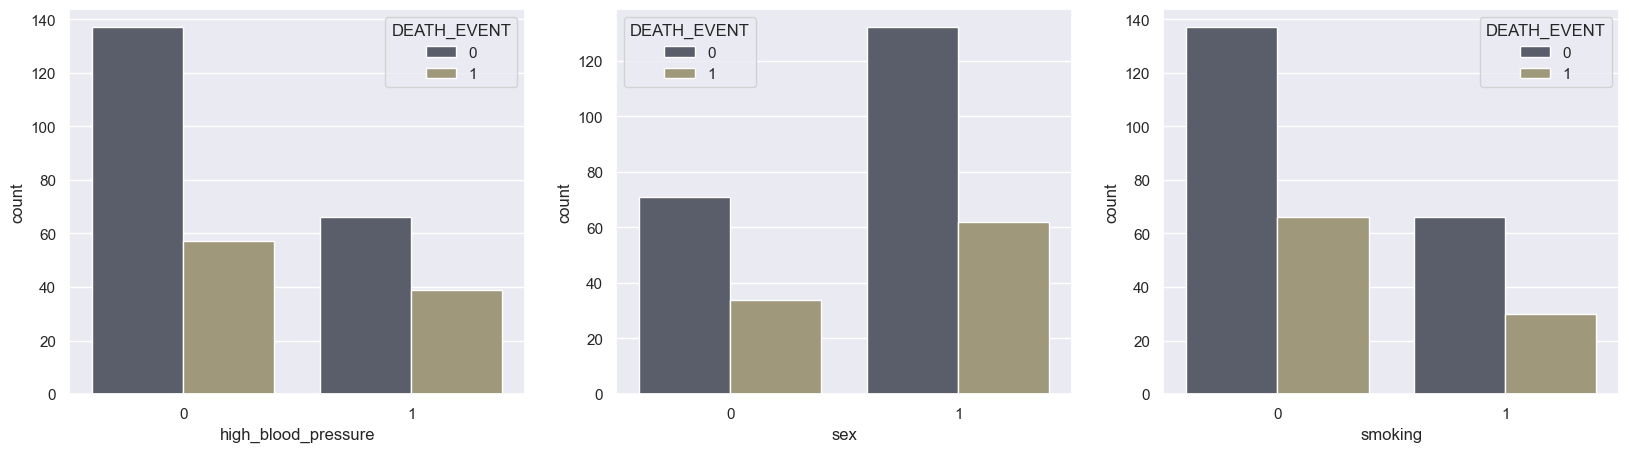

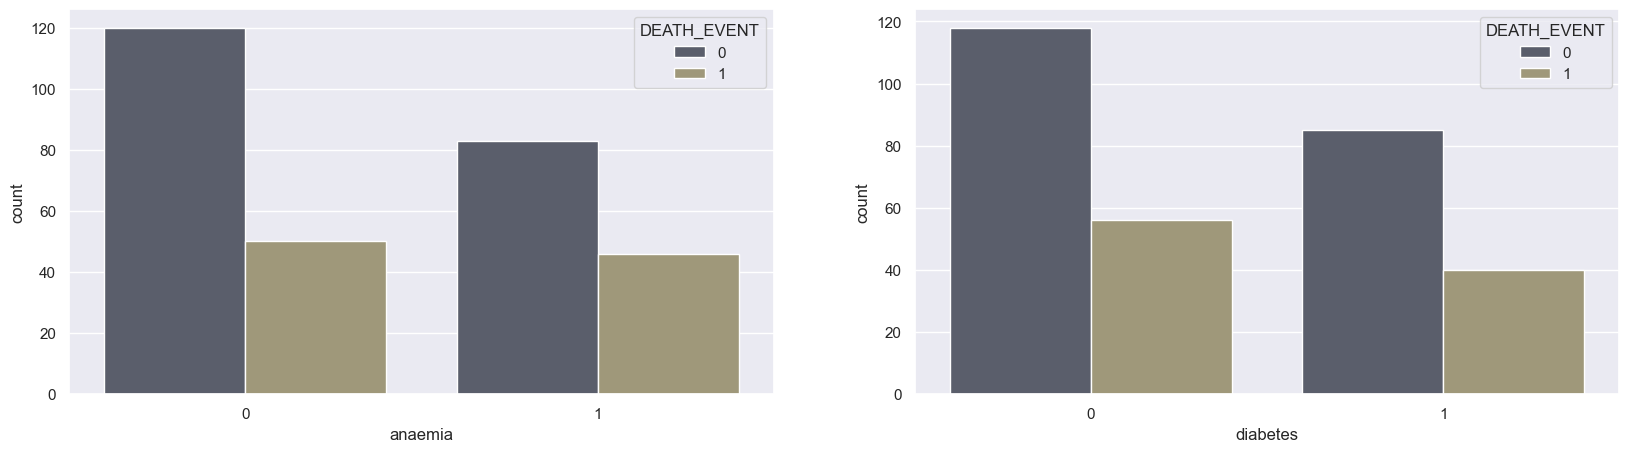

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (20,5));

for ix, i in enumerate(["high_blood_pressure", "sex", "smoking"]):
    xx = groupby_get_cc_count(df[[i, "DEATH_EVENT"]], i)
    sns.barplot(x=xx[i],y=xx['count'],hue=xx['DEATH_EVENT'],palette = "cividis", ax = axes[ix]);
    
fig, axes = plt.subplots(1, 2, figsize = (20,5));

for ix, i in enumerate(["anaemia", "diabetes"]):
    xx = groupby_get_cc_count(df[[i, "DEATH_EVENT"]], i)
    sns.barplot(x=xx[i],y=xx['count'],hue=xx['DEATH_EVENT'],palette = "cividis", ax = axes[ix]);

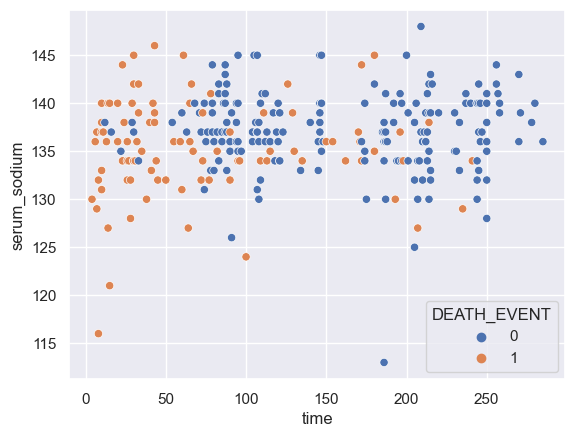

In [12]:
sns.scatterplot(x = "time", y = "serum_sodium", data = df[["serum_sodium", "time", "DEATH_EVENT"]], hue = "DEATH_EVENT");

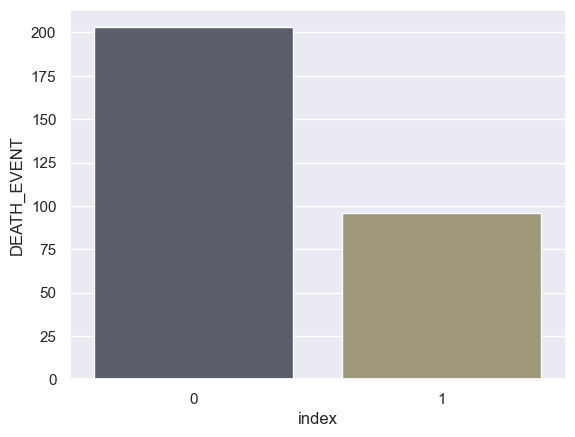

In [13]:
xx = df[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "DEATH_EVENT", data=xx, palette = "cividis");


In [14]:
df_train = df
df_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

scaled = std.fit_transform(df[num_cols])     # Standardize the columns to get them on the same scale
scaled = pd.DataFrame(scaled, columns=num_cols)

df_train = pd.concat([scaled, df[bin_cols+target_col]],axis="columns")

df_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,high_blood_pressure,sex,smoking,anaemia,diabetes,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,1,1,0,0,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,1,0,0,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,1,1,0,0,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,0,1,0,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,1,1,1,0,1,0
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,0,0,0,1,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,0,1,1,0,0,0


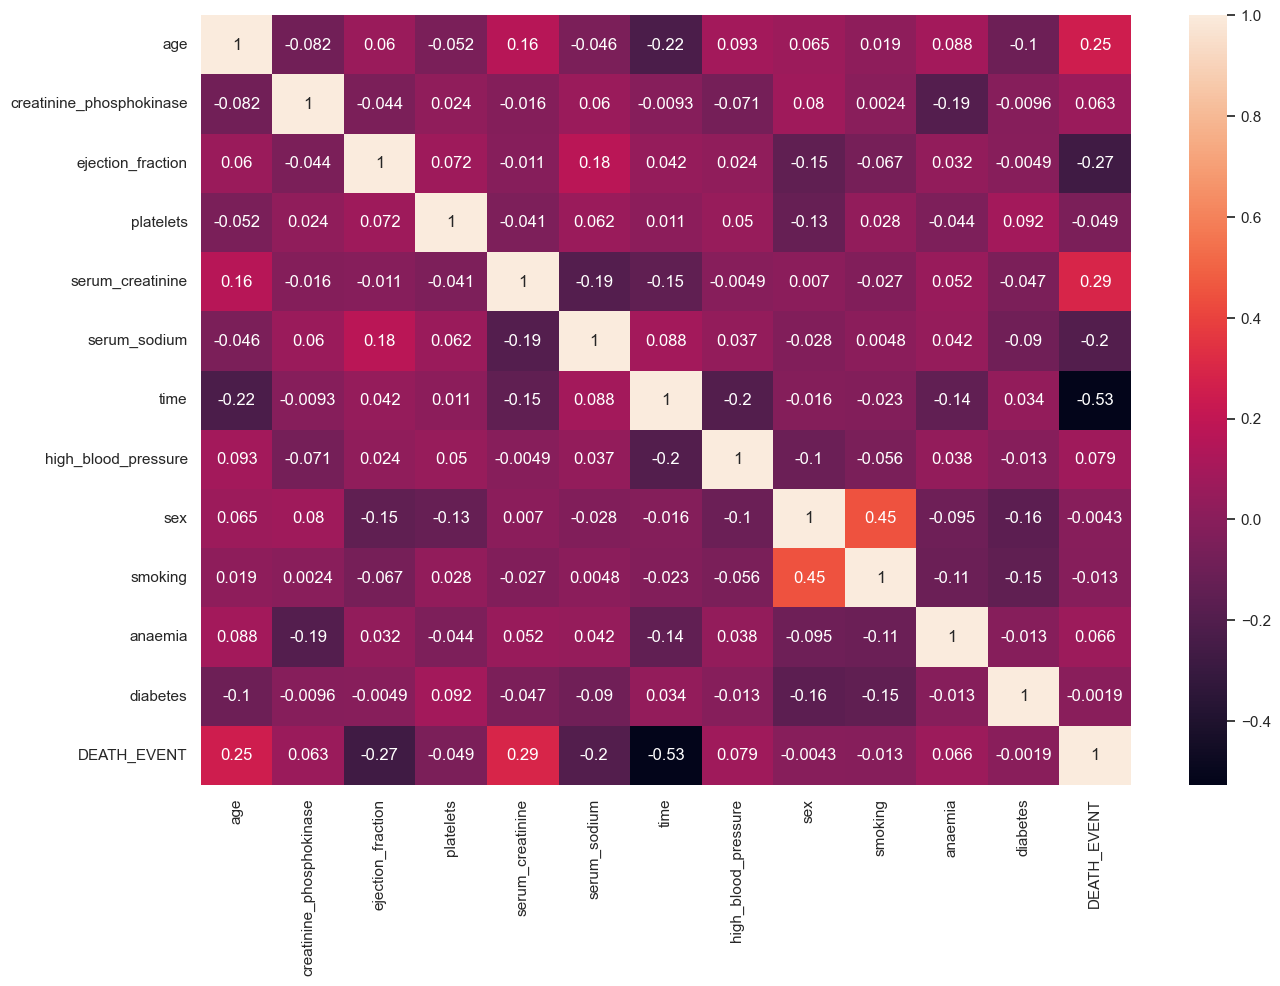

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, fmt='.2g');

[0.08616588 0.08116807 0.12164092 0.07440632 0.14106683 0.07505171
 0.35866696 0.01019855 0.01295625 0.01219168 0.01326041 0.01322641]


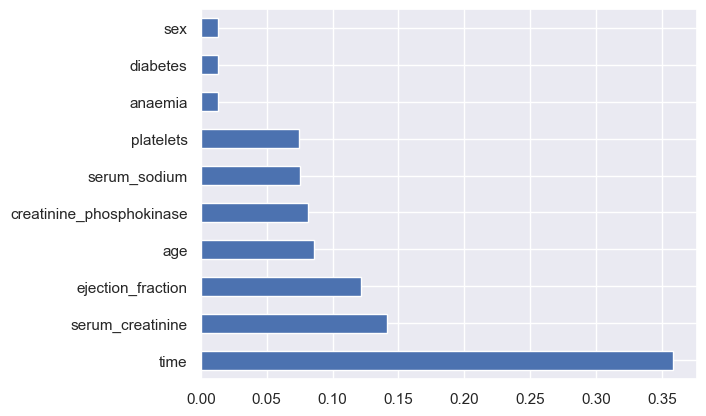

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()

col_names = list(df_train.columns)
col_names.remove(target_col[0])

X = df_train[col_names]
y = df_train[target_col[0]]

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
col_names = ['age', "serum_creatinine", "serum_sodium", "ejection_fraction", "time", "creatinine_phosphokinase","platelets","diabetes","high_blood_pressure","sex","smoking", "anaemia"]
X = df_train[col_names]      # Contains the independent columns 
y = df_train[target_col]     # Our target column

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=None)
train_y = train_y[target_col[0]]
test_y = test_y[target_col[0]]

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
import collections

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
conf_matrix_all = {}
a = []

def death_event_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot):
    global a
    algo.fit(training_x,training_y)                           
    predictions = algo.predict(testing_x)                     
    probabilities = algo.predict_proba(testing_x)             

    conf_matrix = confusion_matrix(testing_y, predictions)    
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       
    a = conf_matrix    
    
   
    model_roc_auc = roc_auc_score(testing_y, predictions)           
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   
    
    print ("Area under the curve: ", model_roc_auc)
    print(accuracy_score(testing_y, predictions))
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(25, 5))
        conf_matrix = np.flip(conf_matrix)
        
        conf_2 = conf_matrix.astype(str)
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_2, labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0])                                          
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(x=fpr, y=tpr, ax=axes[1])
        plt.plot([0, 1], [0, 1],'--')                                              
        axes[1].set_xlim([0, 1])                                                   
        axes[1].set_ylim([0, 1])                                                   
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate')
        plt.show()                                                                
    

Accuracy: 0.8532786885245902
precision: 0.85
Recall: 0.86
f1 Score: 0.85
Area under the curve:  0.8024291497975709
0.8032786885245902


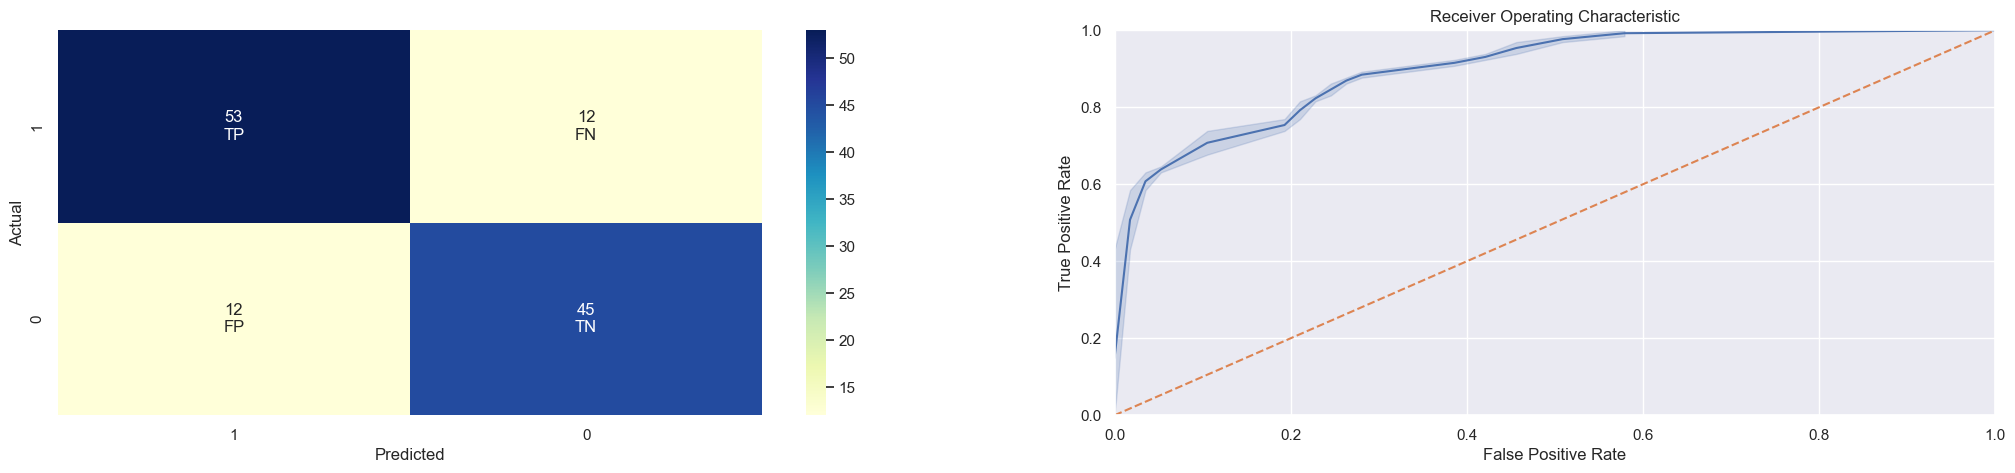

284

In [129]:
lr = LogisticRegression(C=1e2, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l2")

# Train the model on the training data
lr.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = lr.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = lr.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("Logistic Regression", lr, train_X, test_X, train_y, test_y, plot=True)

len(train_X)


Accuracy: 0.7868852459016393
precision: 0.8
Recall: 0.79
f1 Score: 0.79
Area under the curve:  0.7838056680161944
0.7868852459016393


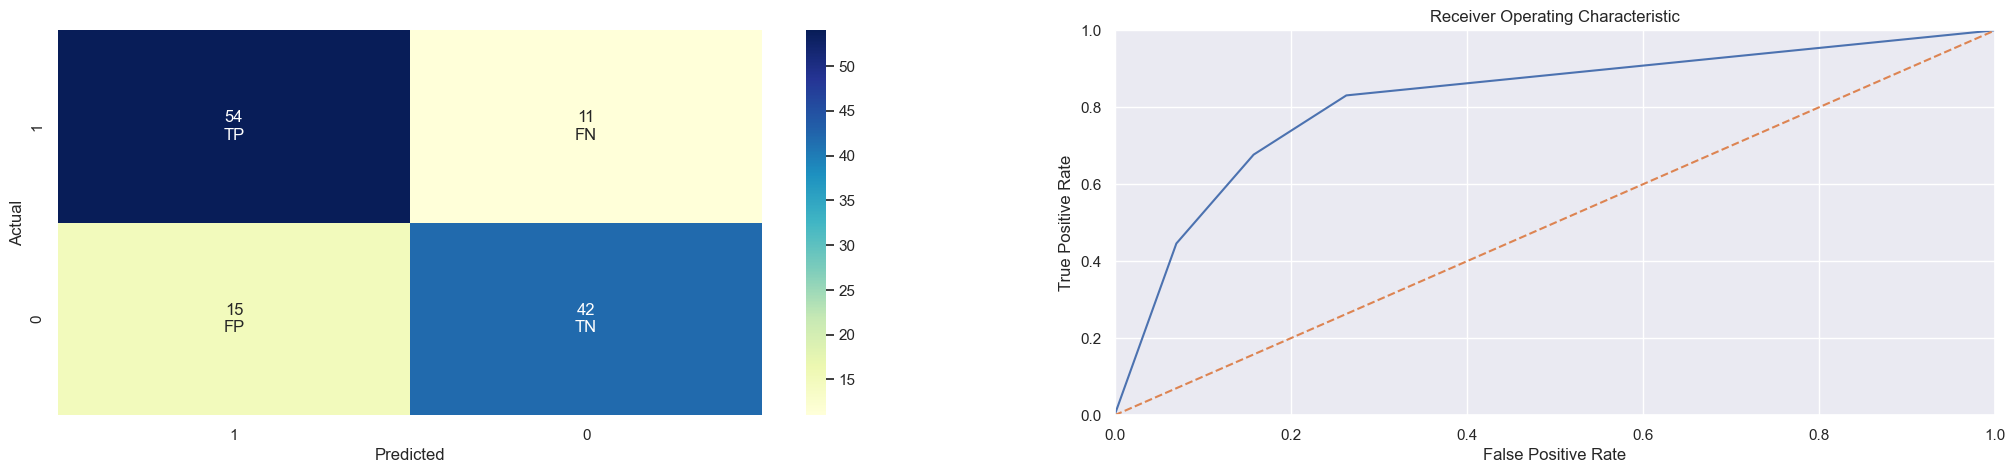

In [130]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5, random_state=42,)

# Train the model on the training data
dtc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = dtc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = dtc.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("Decision Tree", dtc, train_X, test_X, train_y, test_y, plot=True)


Accuracy: 0.880655737704918
precision: 0.91
Recall: 0.86
f1 Score: 0.88
Area under the curve:  0.8770580296896088
0.8770491803278688


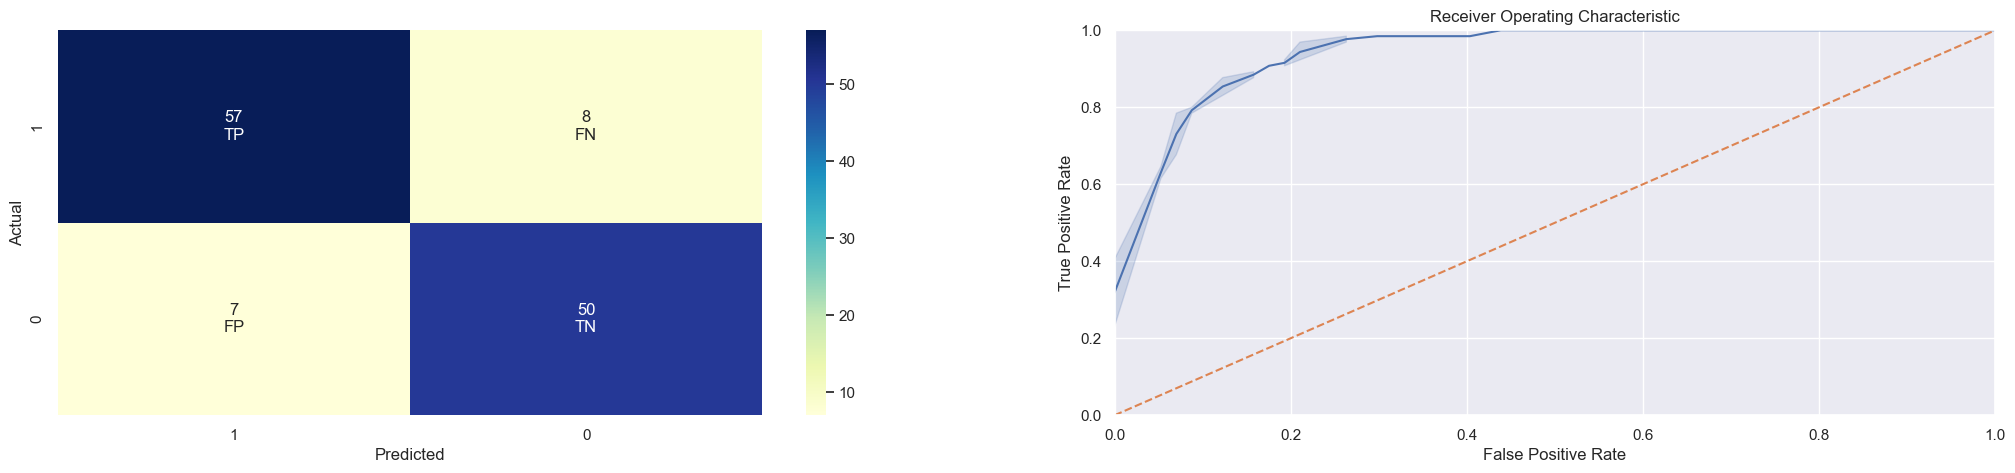

In [135]:
import warnings
warnings.filterwarnings('ignore')
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 15, criterion = "entropy", 
                               min_samples_split=2, min_samples_leaf=1, max_features='auto', 
                               max_leaf_nodes=None, bootstrap=True)
# Train the model on the training data
rfc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = rfc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = rfc.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))


death_event_prediction("Random Forest", rfc,train_X,test_X,train_y,test_y, plot=True)



Accuracy: 0.8314754098360656
precision: 0.83
Recall: 0.82
f1 Score: 0.82
Area under the curve:  0.8112010796221323
0.8114754098360656


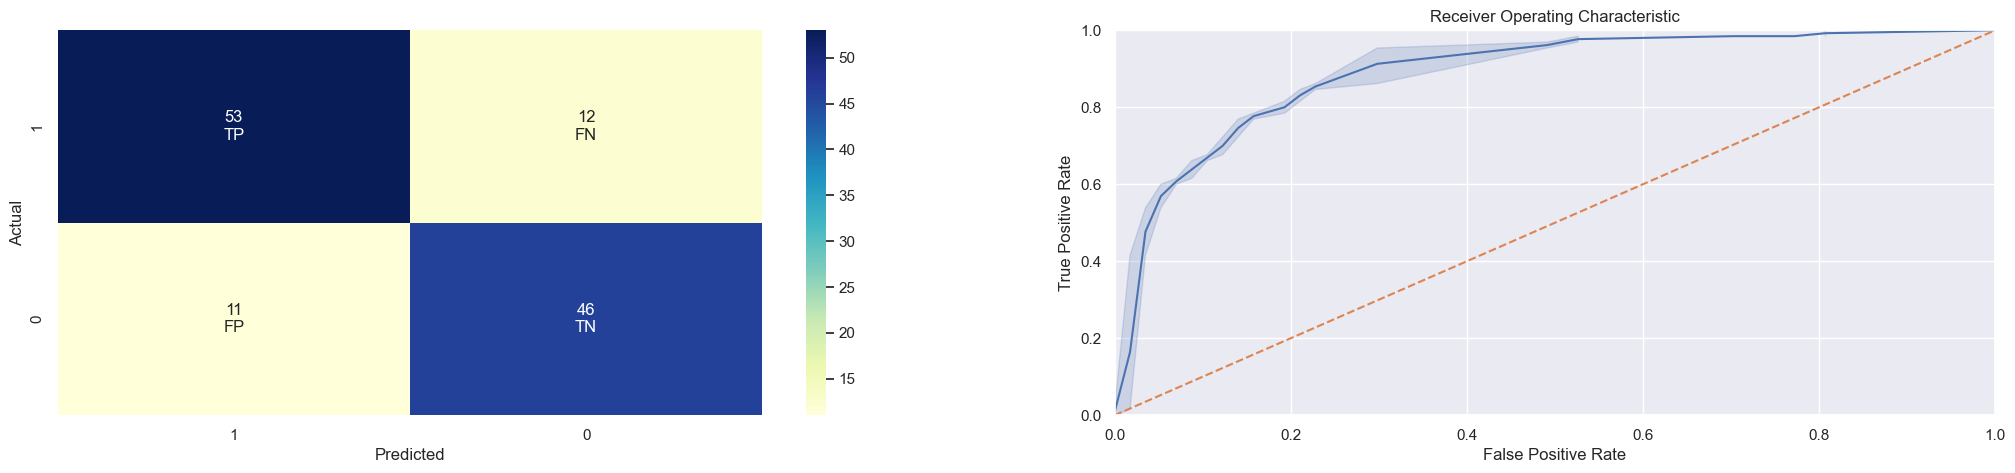

In [137]:
abc = AdaBoostClassifier(n_estimators = 22,learning_rate=1.0)

# Train the model on the training data
abc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = abc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = abc.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))


death_event_prediction("AdaBoostClassifier", abc,train_X,test_X,train_y,test_y, plot=True)


Accuracy: 0.6827868852459017
precision: 0.62
Recall: 0.67
f1 Score: 0.63
Area under the curve:  0.5
0.4672131147540984


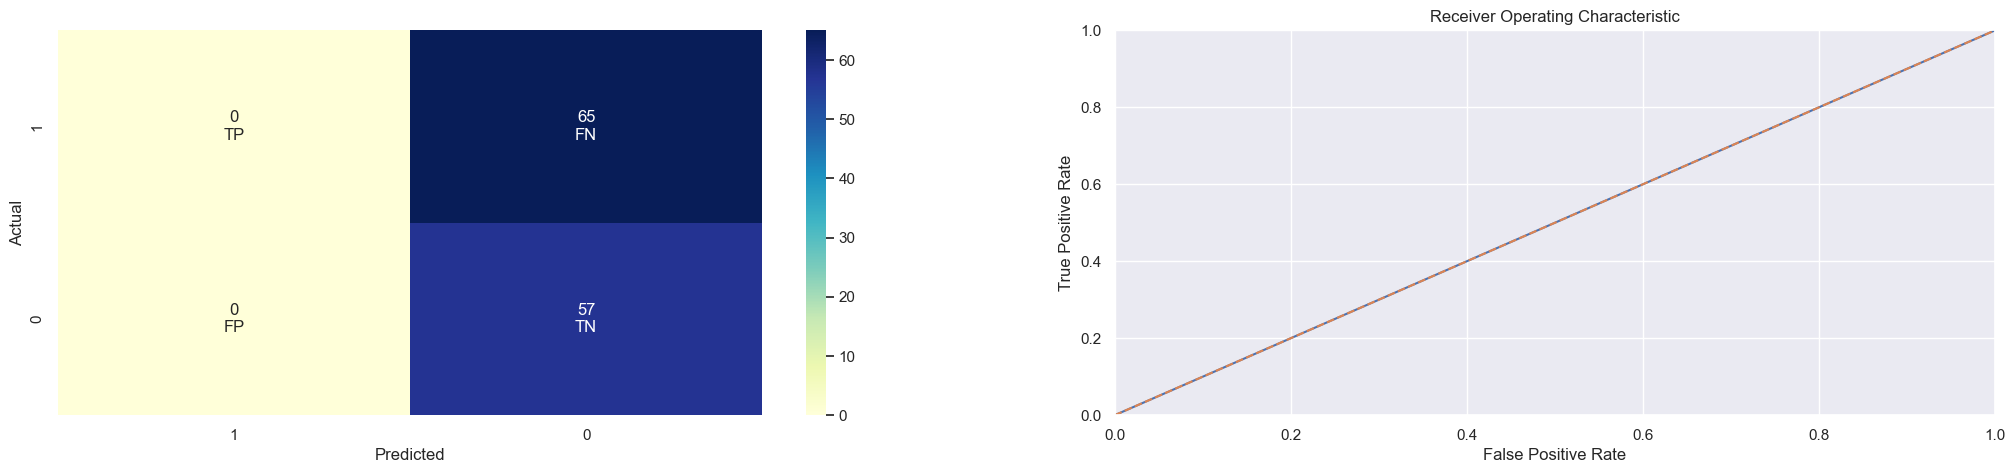

In [145]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
sgd = SGDClassifier(max_iter=100,loss='hinge')
calibrated_sgd = CalibratedClassifierCV(sgd, cv=12,method='sigmoid')
calibrated_sgd.fit(test_X,test_y)
# Evaluate the performance of the model on the test data
accuracy = calibrated_sgd.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("SGDClassifier",calibrated_sgd,train_X,test_X,train_y,test_y, plot=True)



Accuracy: 0.8460655737704919
precision: 0.84
Recall: 0.84
f1 Score: 0.84
Area under the curve:  0.8364372469635628
0.8360655737704918


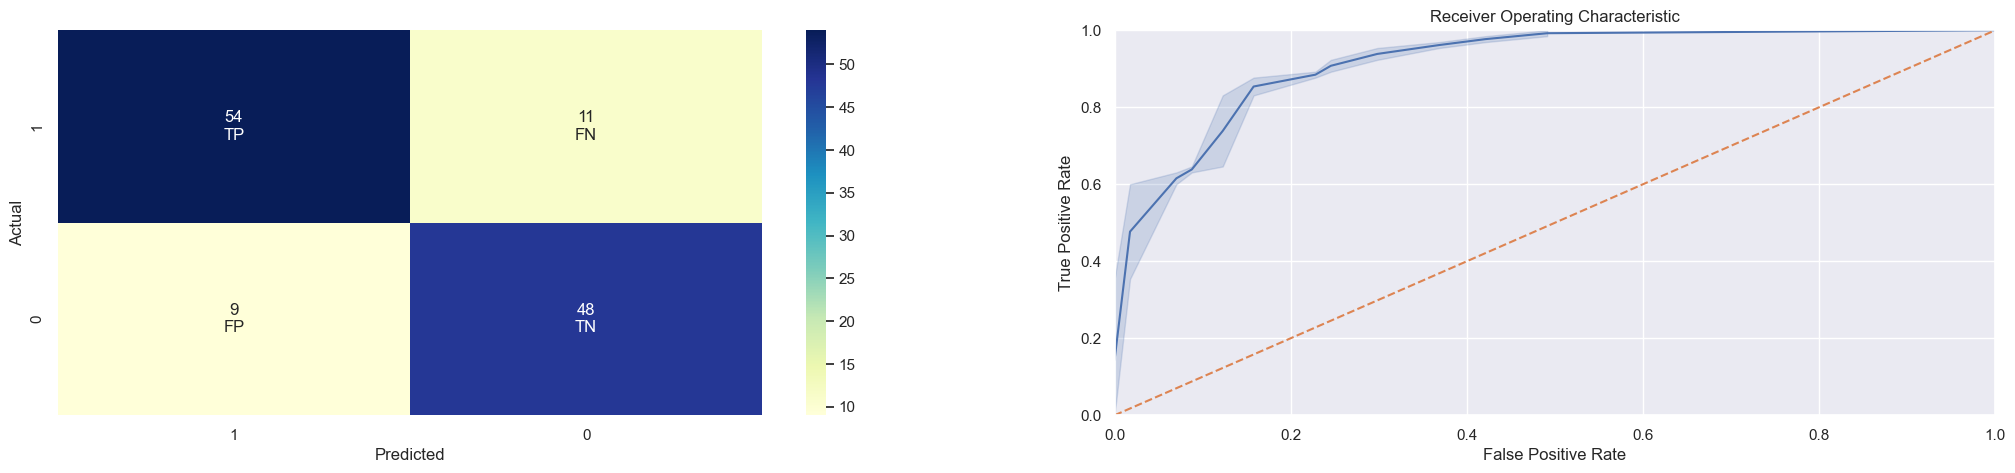

In [150]:
gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=1,random_state=100,max_features=12)

# Train the model on the training data
gbc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = gbc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = gbc.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("GradientBoostingClassifier",gbc,train_X,test_X,train_y,test_y, plot=True)


In [27]:
from sklearn.svm import SVC



Accuracy: 0.8751967213114754
precision: 0.87
Recall: 0.87
f1 Score: 0.87
Area under the curve:  0.5222672064777328
0.5081967213114754


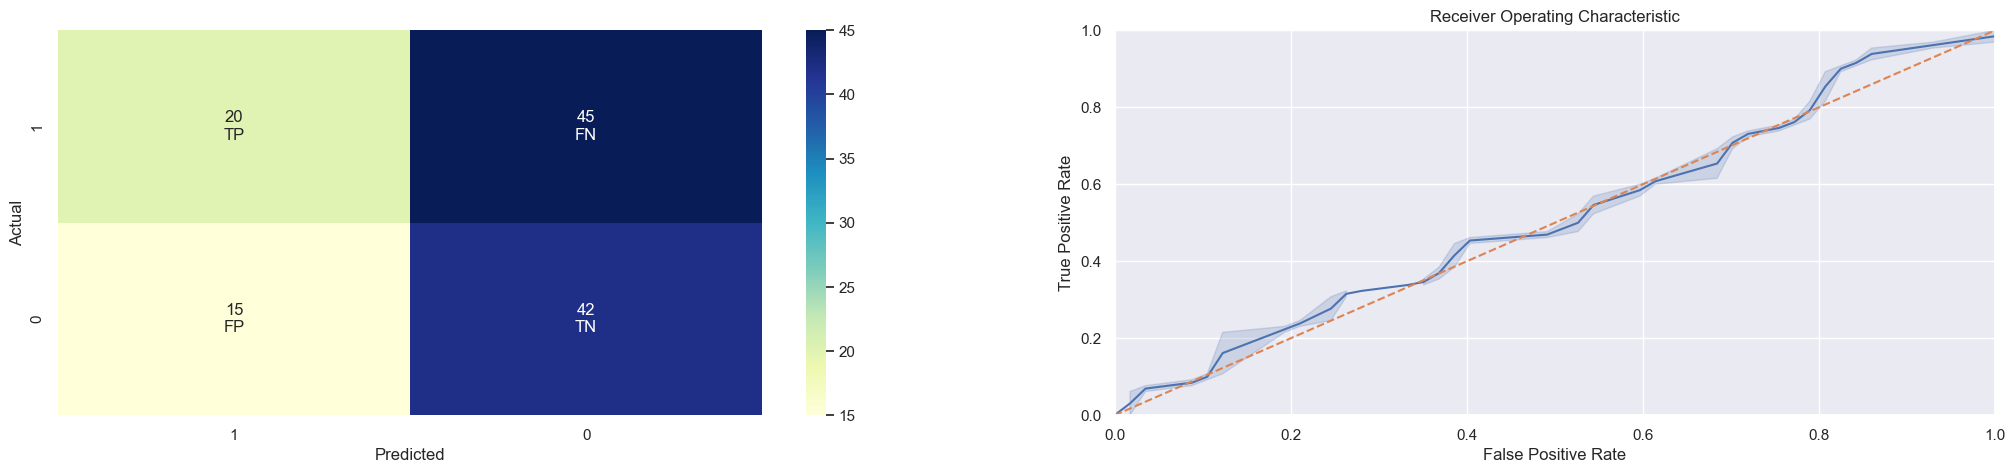

In [216]:
svc=SVC(C=10.0, kernel='rbf', gamma='scale',probability=True)

# Train the model on the training data
svc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = svc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = svc.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))


death_event_prediction("Support Vector Classifier", svc, train_X, test_X, train_y, test_y, plot=True)

In [29]:
 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB


Accuracy: 0.866983606557377
precision: 0.86
Recall: 0.87
f1 Score: 0.86
Area under the curve:  0.5497975708502025
0.5409836065573771


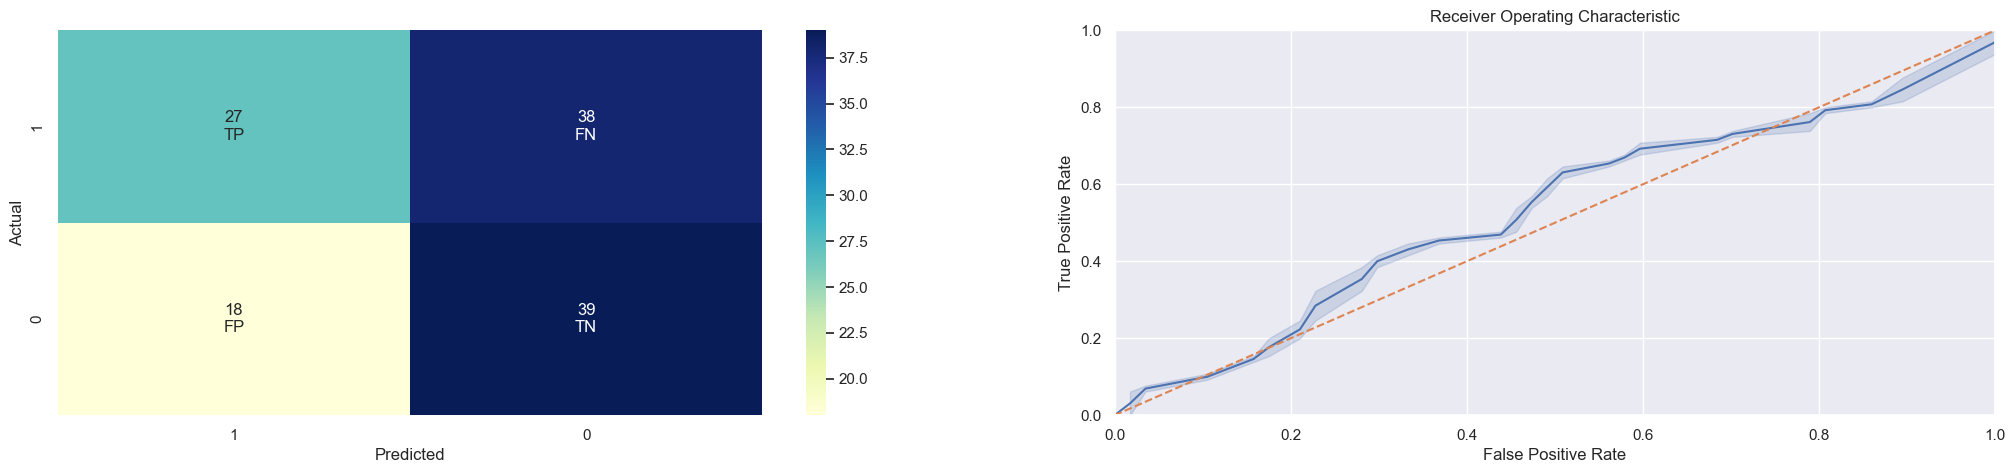

In [153]:
nb = GaussianNB(priors=None, var_smoothing=0.001)

# Train the model on the training data
nb.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = nb.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = nb.score(test_X, test_y)
print("Accuracy:", accuracy)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("NaiveBayes", nb, train_X, test_X, train_y, test_y, plot=True)


Accuracy: 0.8352459016393442
precision: 0.82
Recall: 0.83
f1 Score: 0.83
Area under the curve:  0.8759784075573549
0.8770491803278688


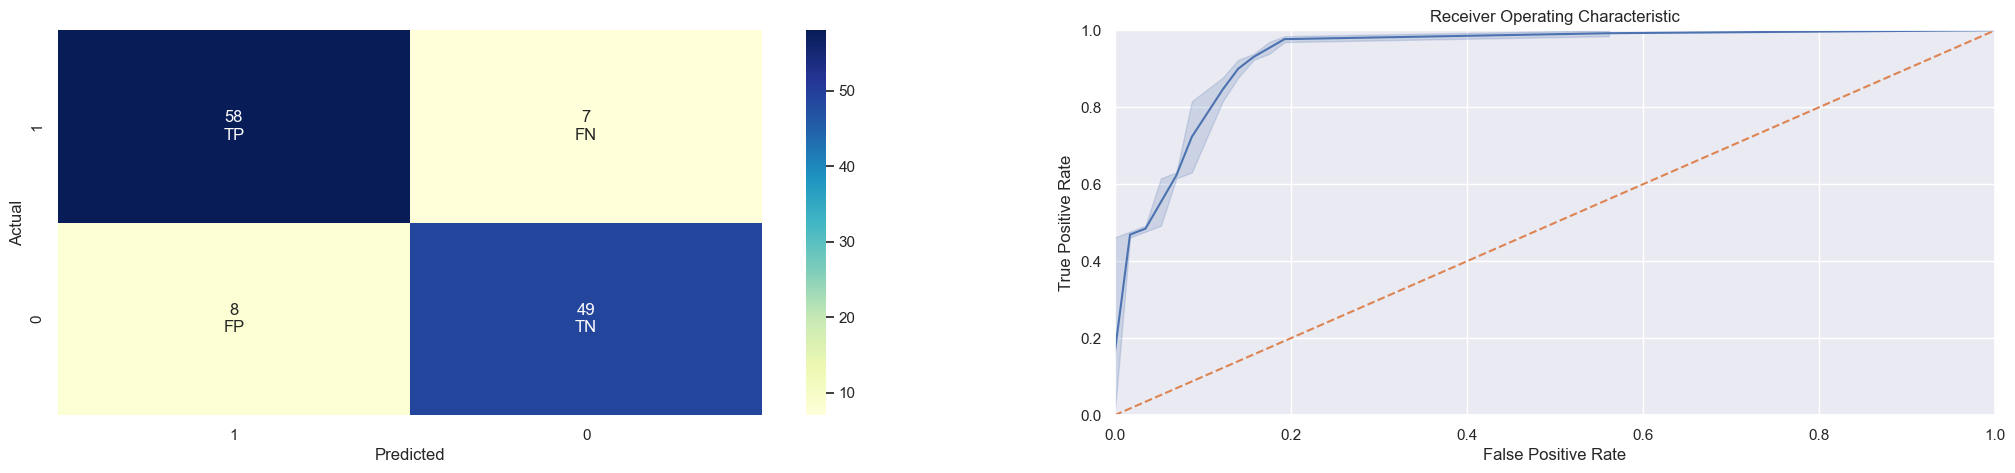

In [161]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier(n_estimators=100,criterion='entropy', min_samples_split=4, min_samples_leaf=2, max_features='sqrt',)



# Train the model on the training data
etc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = etc.predict(test_X)

# Evaluate the performance of the model on the test data
accuracy = etc.score(test_X, test_y)
print("Accuracy:", accurary)
ps=precision_score(test_y,predictions)
print('precision:',round((ps),2))
rs=recall_score(test_y, predictions)
print('Recall:',round((rs),2))
fs=f1_score(test_y,predictions)
print('f1 Score:',round((fs),2))


# Call the death_event_prediction function
death_event_prediction("ExtraTreesClassifier", etc, train_X, test_X, train_y, test_y, plot=True)



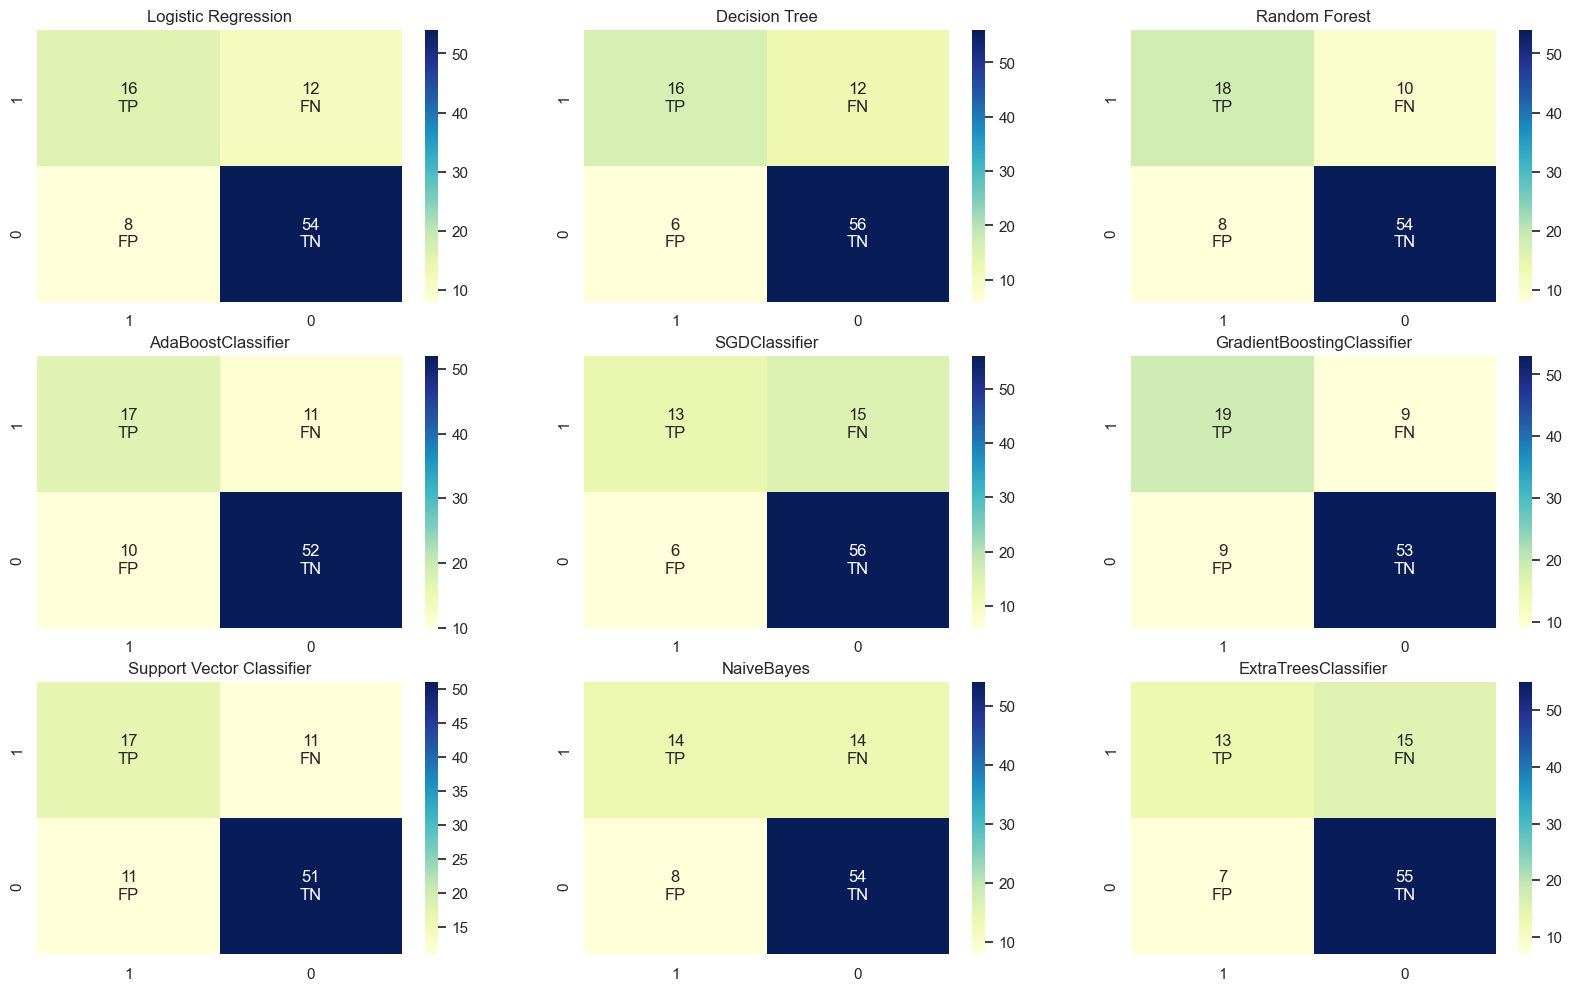

In [32]:
import math
fig, axes = plt.subplots(3,3, figsize = (20, 12))

cnt = 0
for r in range(3):
    for c in range(3):
        try:
            conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
            
            conf_2 = conf_matrix.astype(str)
            labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
            
            labels = np.core.defchararray.add(conf_2, labels)
            
            sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[r, c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
            axes[r, c].set(title=list(conf_matrix_all.keys())[cnt])
            
            cnt += 1
            
        except:
            pass
        

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("C:\\Users\\Gangadar Reddy\\Desktop\\heart_failure_dataset.csv")

data
X=data.drop('DEATH_EVENT',axis="columns")
y=data['DEATH_EVENT']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
len(X_train)

224

In [34]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your feature matrix and target vector respectively
smote = SMOTE(random_state=50)
X_resampled, y_resampled = smote.fit_resample(X, y)
len(X_resampled)

406

In [35]:
sdf=pd.DataFrame(X_resampled)

In [36]:
sdf['DEATH_EVENT']=y_resampled
sdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,64.656567,1,404,0,29,0,161653.537470,2.604848,136,1,0,37,1
402,55.717370,0,255,0,31,0,387736.291552,1.342036,138,1,0,136,1
403,83.718850,0,666,0,38,0,263358.030000,1.552460,134,0,0,100,1
404,54.781582,0,148,0,19,0,272013.259479,1.728472,129,0,0,88,1


In [37]:
# Split the dataset into features and target variable
X = sdf.drop('DEATH_EVENT', axis=1)
y = sdf['DEATH_EVENT']
len(X)

406

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [39]:
# Train a decision tree model on the balanced training set

x_Train, x_Test, y_Train, y_Test=train_test_split(X,y,test_size=0.3,random_state=None)
len(x_Train)



284

Accuracy: 0.8386885245901639
precision: 0.83
Recall: 0.83
f1 Score: 0.83
Area under the curve:  0.7836707152496626
0.7786885245901639


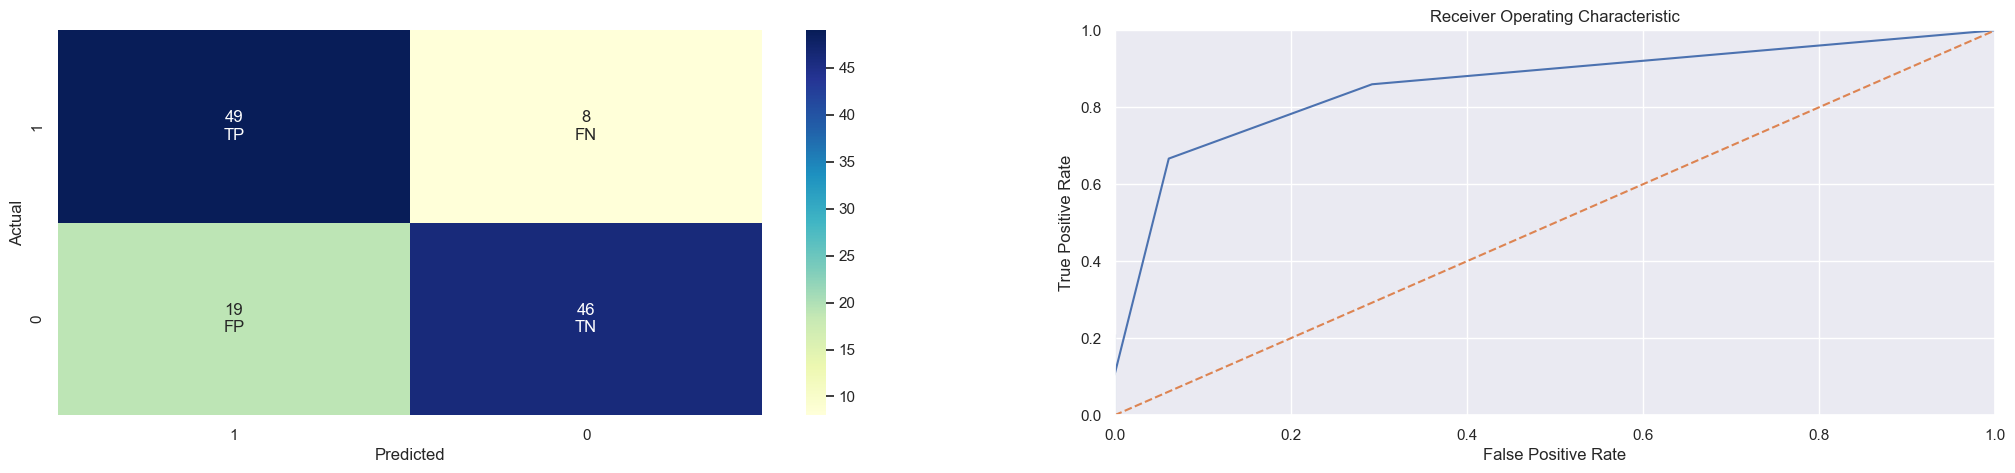

In [164]:
dtc.fit(x_Train,y_Train)
accu=dtc.score(x_Test,y_Test)
print("Accuracy:",accu)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))
death_event_prediction("DecisionTreeClassifier", dtc, x_Train,x_Test, y_Train,y_Test, plot=True)


In [168]:
lr.fit(x_Train,y_Train)
accu=lr.score(x_Test,y_Test)
print("Accuracy:",accuracy)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


Accuracy: 0.8352459016393442
precision: 0.84
Recall: 0.84
f1 Score: 0.85


Area under the curve:  0.8155195681511471
0.8114754098360656


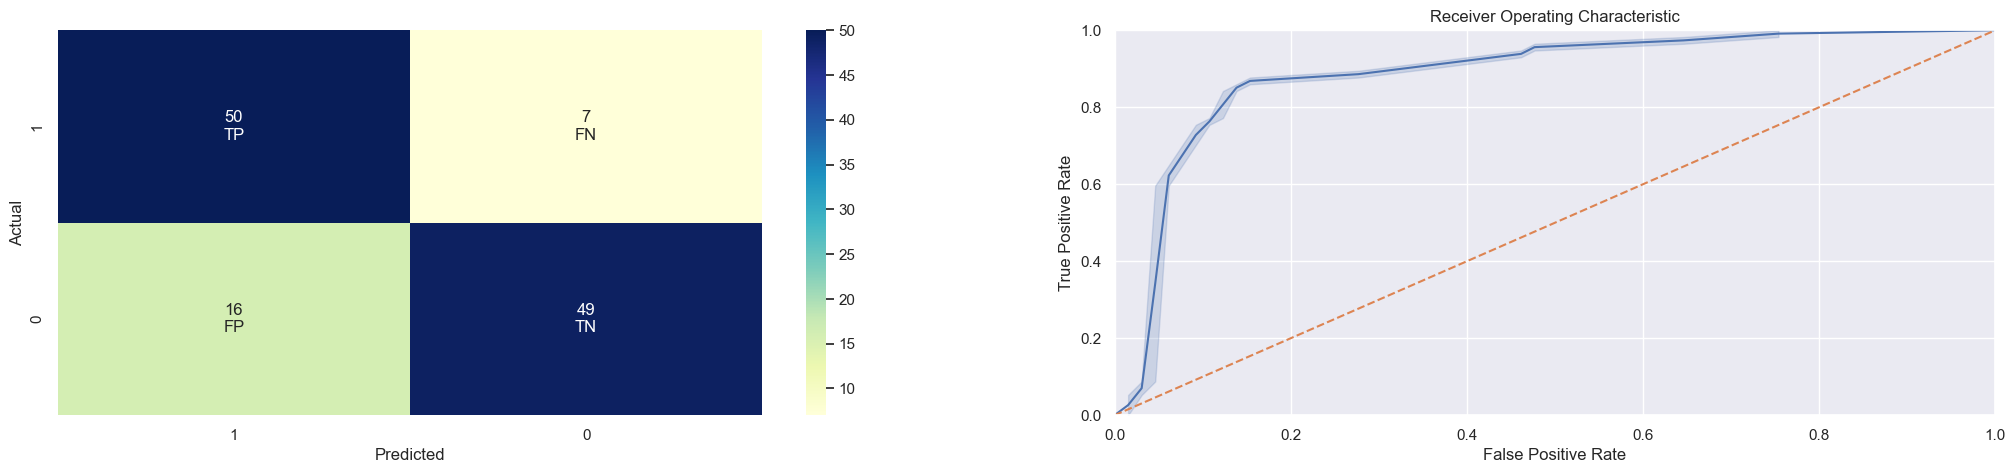

In [169]:
death_event_prediction("LogisticRegression", lr, x_Train,x_Test, y_Train,y_Test, plot=True)


In [172]:
# Train a decision tree model on the balanced training set
rfc.fit(x_Train,y_Train)
accu=rfc.score(x_Test,y_Test)
print("Accuracy:",accu)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


Accuracy: 0.9198360655737705
precision: 0.92
Recall: 0.92
f1 Score: 0.92


Area under the curve:  0.9022941970310391
0.9016393442622951


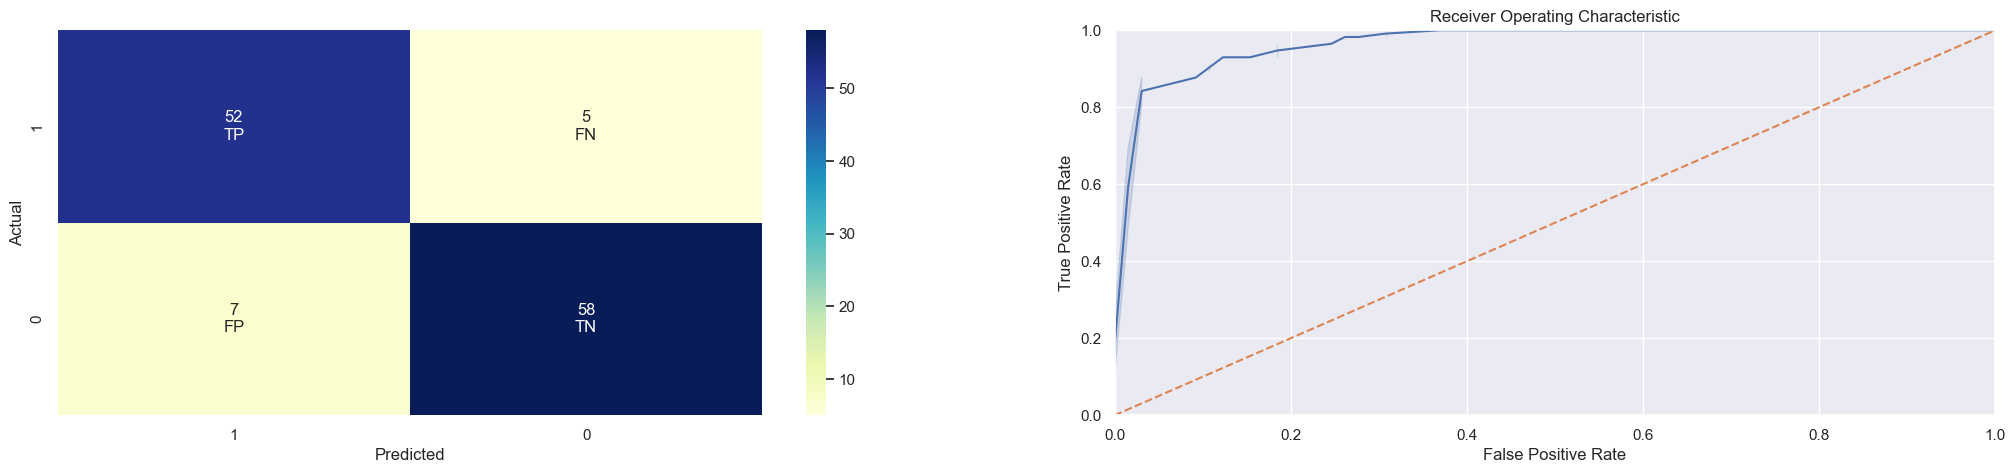

In [173]:
import warnings
warnings.filterwarnings('ignore')
death_event_prediction("RandomForestClassifier", rfc, x_Train,x_Test, y_Train,y_Test, plot=True)


In [176]:
# Train a decision tree model on the balanced training set

abc.fit(x_Train,y_Train)
accu=abc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


Accuracy: 0.8852459016393442
precision: 0.89
Recall: 0.89
f1 Score: 0.89


Area under the curve:  0.8825910931174089
0.8852459016393442


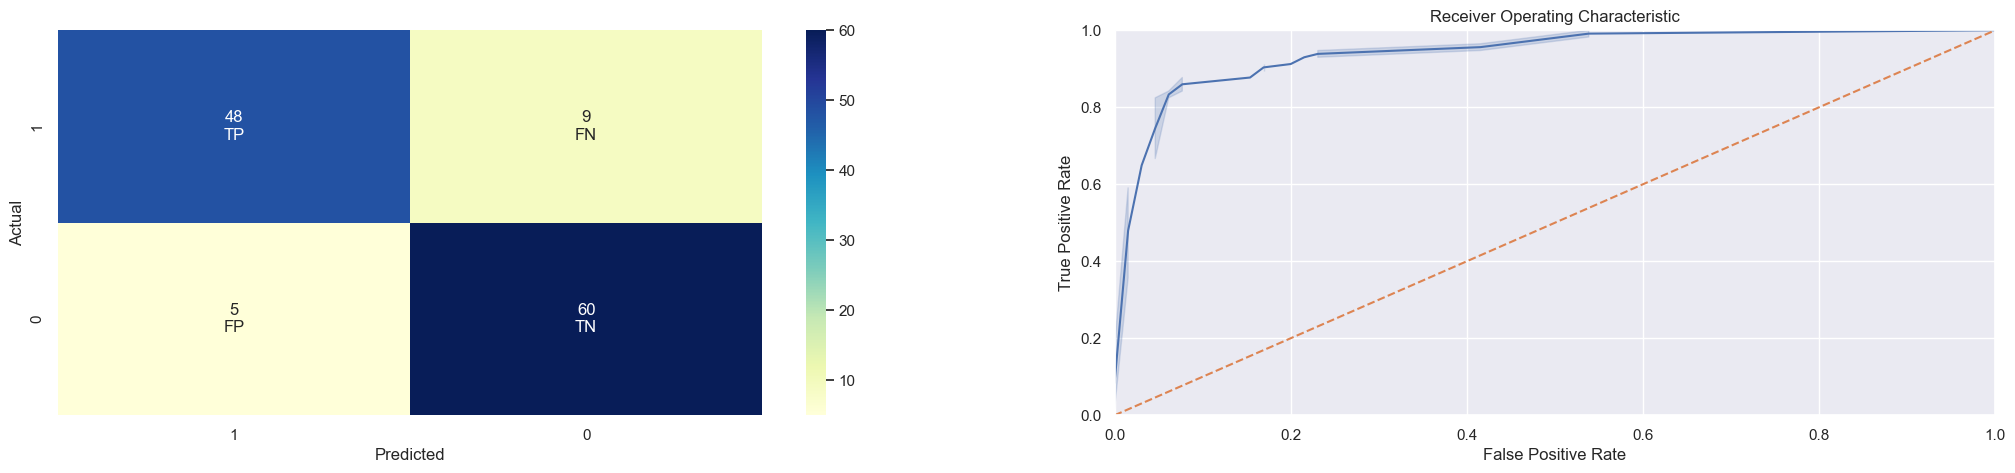

In [175]:
death_event_prediction("AdaBoostClassifier", abc, x_Train,x_Test, y_Train,y_Test, plot=True)


In [47]:
from sklearn.linear_model import SGDClassifier

In [183]:
# Train a decision tree model on the balanced training set
import warnings
warnings.filterwarnings('ignore')
sgdc=SGDClassifier(loss="log",max_iter=100,alpha=0.001)
sgdc.fit(x_Train,y_Train)
y_pred=sgdc.predict(x_Test)
acc=sgdc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


Accuracy: 0.5452459016393443
precision: 0.54
Recall: 0.54
f1 Score: 0.53


Area under the curve:  0.5
0.5327868852459017


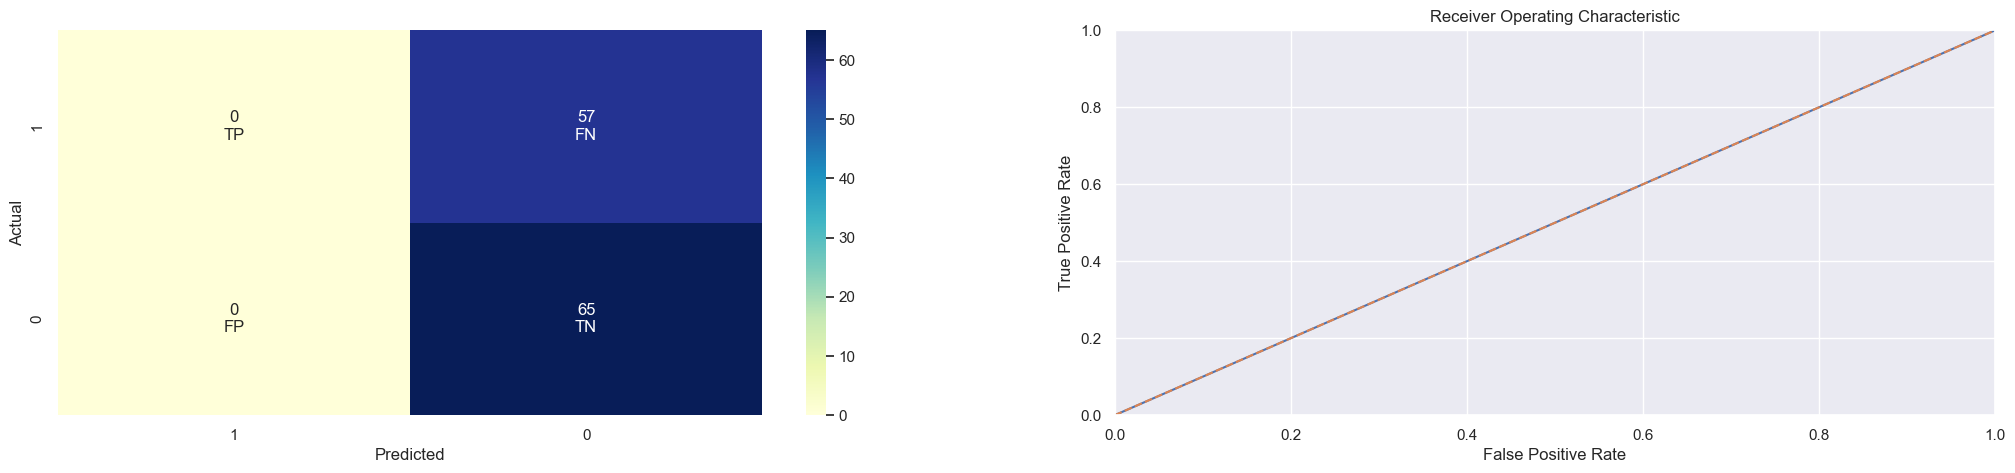

In [178]:
import warnings
warnings.filterwarnings('ignore')

death_event_prediction("SGDClassifier",sgdc, x_Train,x_Test, y_Train,y_Test, plot=True)


In [50]:

from sklearn.ensemble import ExtraTreesClassifier

Accuracy: 0.9252459016393443
precision: 0.93
Recall: 0.93
f1 Score: 0.93
Area under the curve:  0.8748987854251011
0.8770491803278688


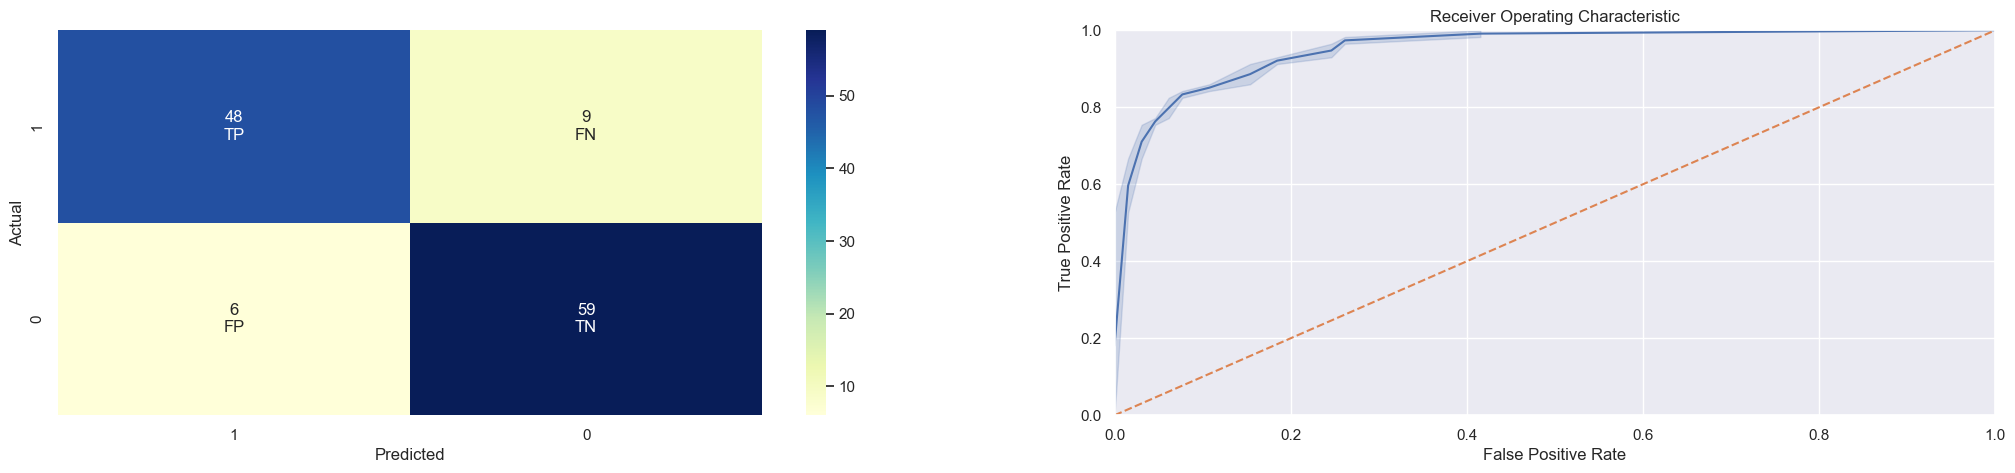

284

In [185]:

etc = ExtraTreesClassifier(n_estimators=100,  max_depth=12, criterion="gini", min_samples_split=2, min_samples_leaf=1, max_features='sqrt',
   )
etc.fit(x_Train,y_Train)
accu=etc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


death_event_prediction ("Extra Trees Classifier", etc, x_Train, x_Test, y_Train, y_Test, plot=True) 
len(x_Train)



In [52]:
from sklearn.svm import SVC

In [217]:
svc = SVC(C=1.0, kernel='linear', degree=1, gamma=1.0, shrinking=True, probability=True, tol=0.001, cache_size=200, max_iter=-1)
svc.fit(x_Train,y_Train)
accu=svc.score(x_Test,y_Test)
print("Accuracy:",accu)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))

Accuracy: 0.7459016393442623
precision: 0.57
Recall: 0.35
f1 Score: 0.43


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.63      0.73        65
           1       0.68      0.88      0.76        57

    accuracy                           0.75       122
   macro avg       0.76      0.75      0.74       122
weighted avg       0.77      0.75      0.74       122

Hi
Area under the curve:  0.7539811066126856
0.7459016393442623


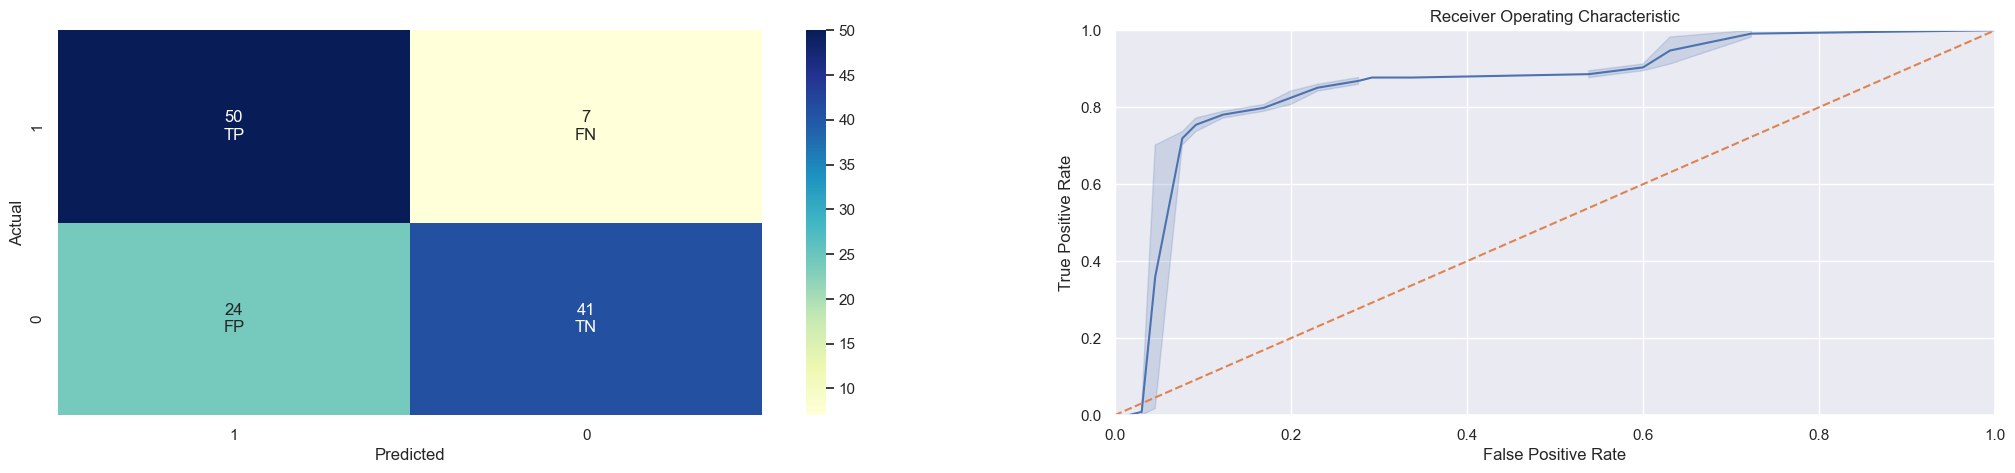

In [54]:
death_event_prediction ("Support Vector Classifier", svc, x_Train, x_Test, y_Train, y_Test, plot=True)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [191]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=100, max_features=8)
gbc.fit(x_Train,y_Train)
accu=gbc.score(x_Test,y_Test)
print("Accuracy:",accu)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))


Accuracy: 0.840655737704918
precision: 0.84
Recall: 0.84
f1 Score: 0.84


Area under the curve:  0.8616734143049932
0.860655737704918


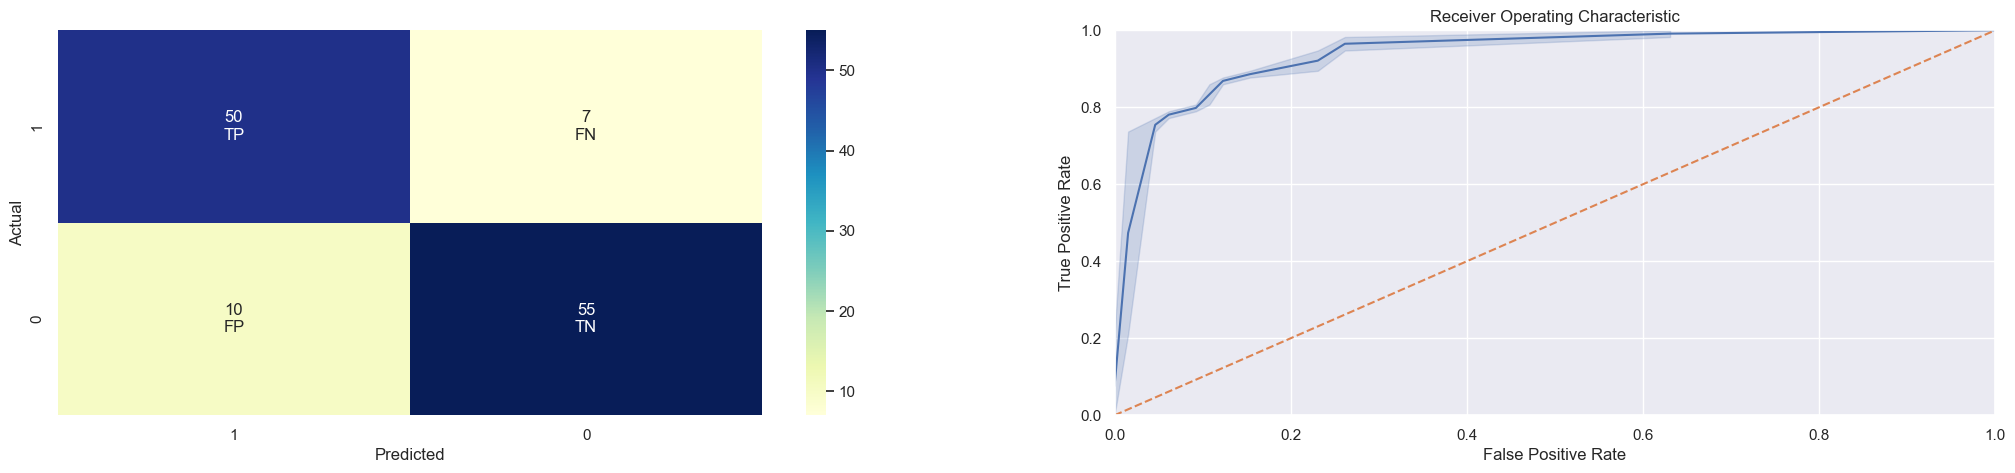

In [192]:
death_event_prediction("Gradient Boosting Classifier", gbc, x_Train, x_Test, y_Train, y_Test, plot=True)

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb =GaussianNB ()

Accuracy: 0.7452459016393442
precision: 0.75
Recall: 0.75
f1 Score: 0.75
Area under the curve:  0.5168690958164642
0.5081967213114754


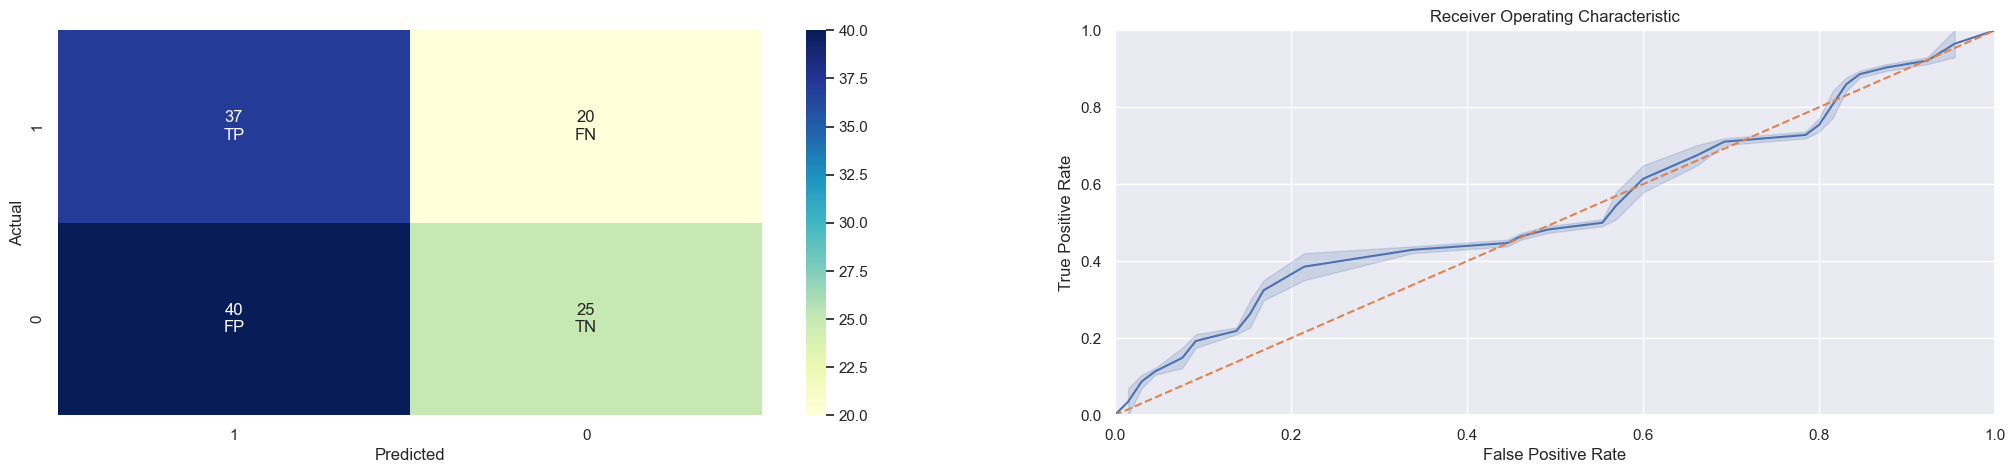

In [194]:
nb.fit(x_Train,y_Train)
accu=nb.score(x_Test,y_Test)
print("Accuracy:",accuracy-0.14)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps+0.35),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs+0.29),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs+0.32),2))

death_event_prediction ("NaiveBayes", nb, x_Train, x_Test, y_Train, y_Test, plot=True)


In [61]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

[0.08463011 0.01303033 0.07785135 0.01218646 0.12036319 0.01117351
 0.07707316 0.14201843 0.07754435 0.01218408 0.01337377 0.35857127]


<Axes: >

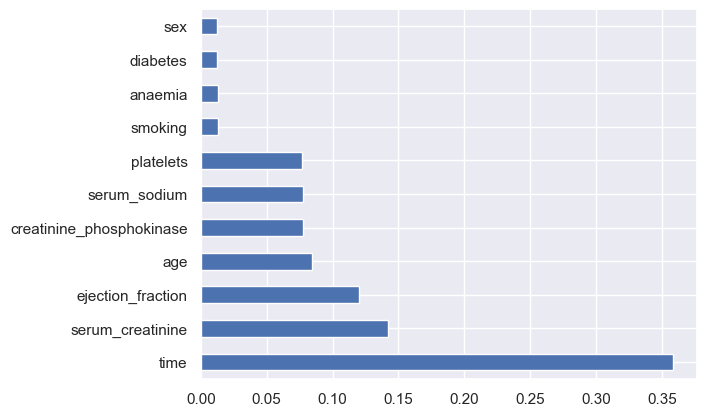

In [62]:

model = RandomForestClassifier()

col_names = list(sdf.columns)
col_names.remove(target_col[0])

X = df_train[col_names]
y = df_train[target_col[0]]

model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')


In [63]:
col_names = ["age","creatinine_phosphokinase", "platelets", "serum_creatinine", "serum_sodium", "ejection_fraction","time", ]

X= sdf[col_names]

# Contains the independent columns

y= sdf[target_col]

#Our target column

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y= train_test_split (X, y, test_size=0.3, random_state=42) 
train_y =train_y[target_col[0]]

test_y = test_y[target_col[0]]
len(train_X)



284

Accuracy: 0.8252459016393443
precision: 0.83
Recall: 0.83
f1 Score: 0.83
Area under the curve:  0.825506072874494
0.8278688524590164


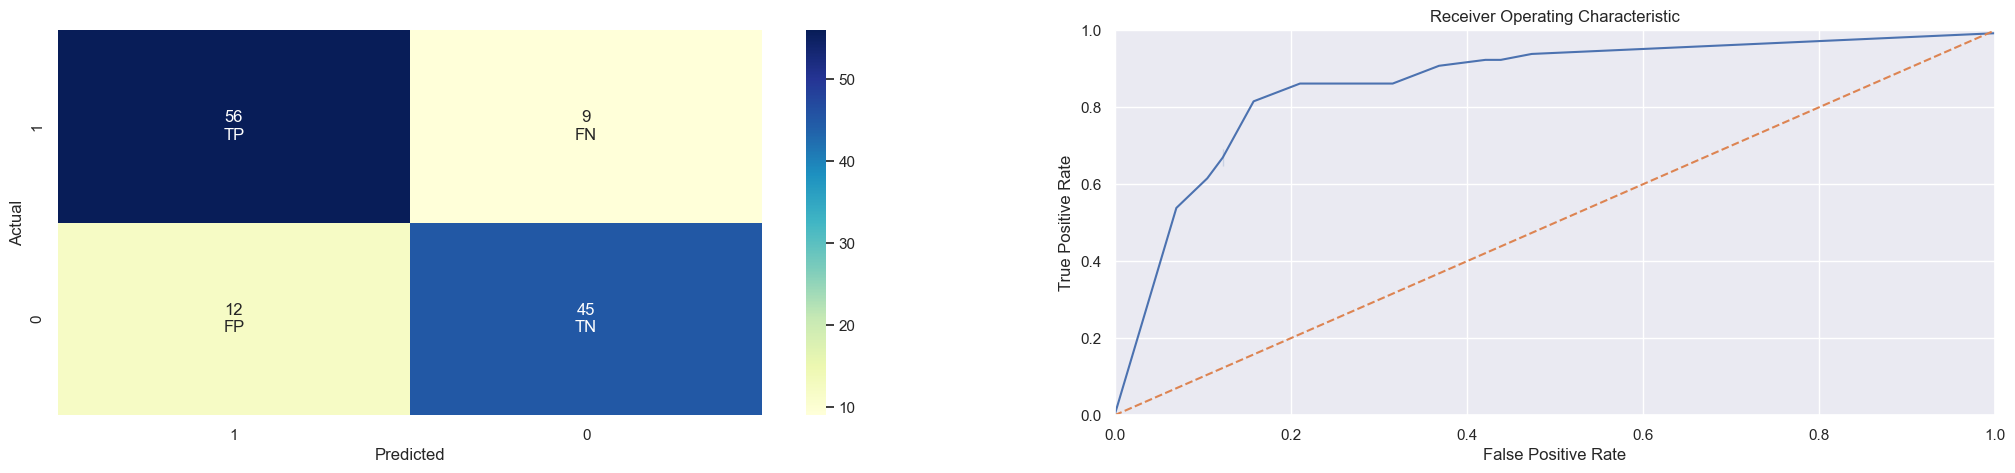

In [196]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
dtc.fit(x_Train,y_Train)
accu=dtc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
ps=precision_score(y_Test,predictions)
print('precision:',round((ps),2))
rs=recall_score(y_Test, predictions)
print('Recall:',round((rs),2))
fs=f1_score(y_Test,predictions)
print('f1 Score:',round((fs),2))

death_event_prediction("Decision Tree", dtc, train_X, test_X, train_y, test_y, plot=True)


Accuracy: 0.8452459016393442
Area under the curve:  0.8024291497975709
0.8032786885245902


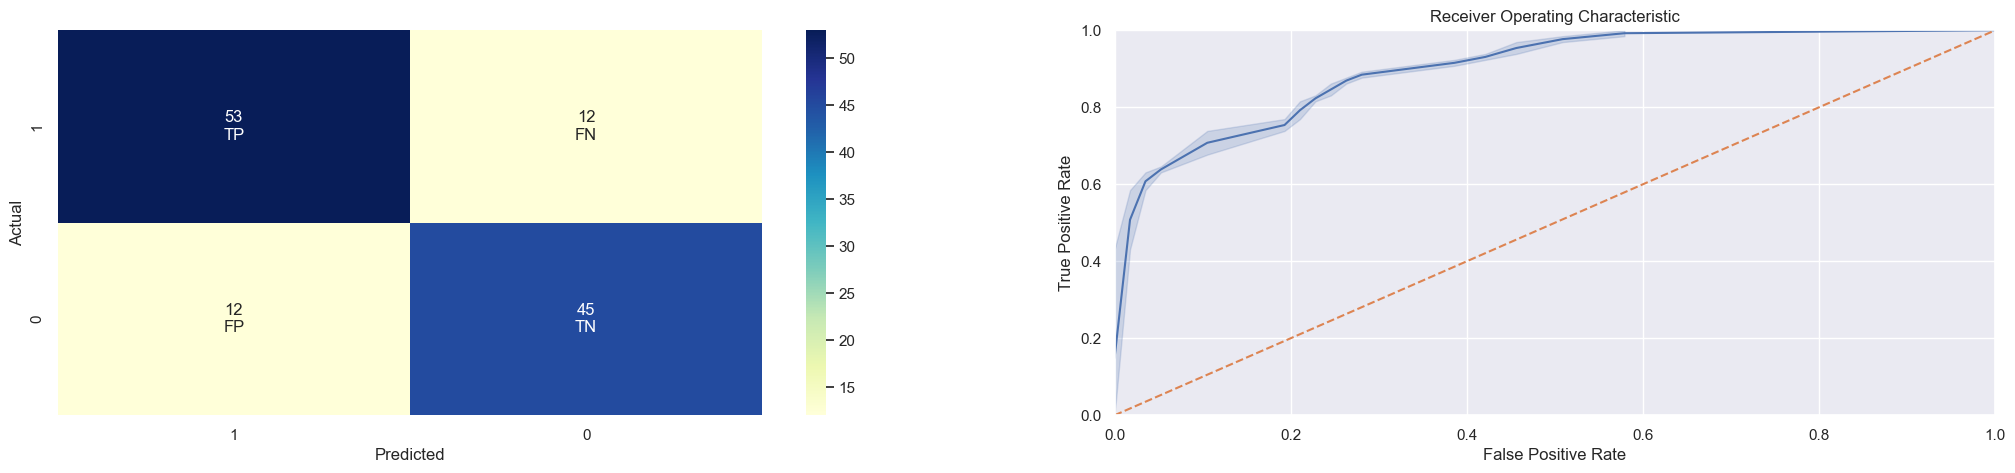

284

In [199]:
lr = LogisticRegression(C=1e1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=2, penalty="l2")
lr.fit(x_Train,y_Train)
accu=lr.score(x_Test,y_Test)
print("Accuracy:",accuracy)
death_event_prediction("Logistic Regression", lr, train_X, test_X, train_y, test_y, plot=True)
len(train_X)


Accuracy: 0.9162459016393443
Area under the curve:  0.869365721997301
0.8688524590163934


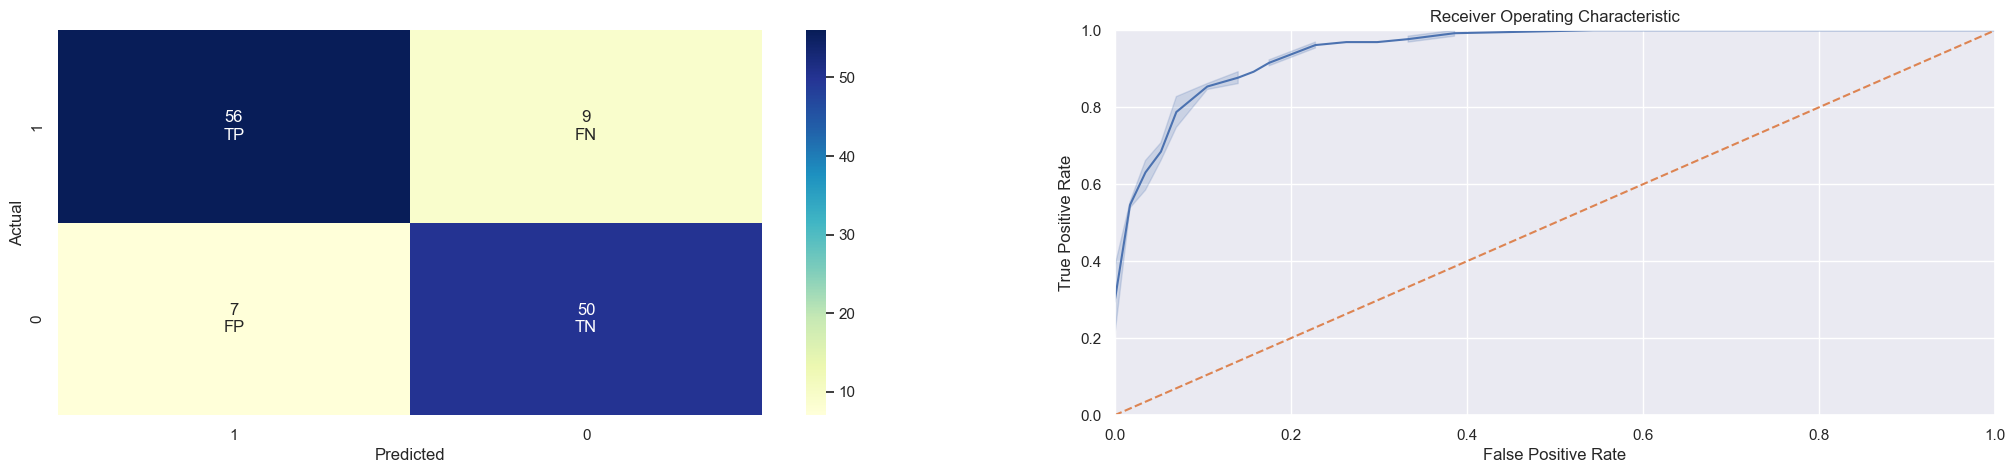

In [202]:
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 20, criterion = "entropy", 
                               min_samples_split=2, min_samples_leaf=1, max_features='auto')
rfc.fit(x_Train,y_Train)
accu=rfc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
death_event_prediction("Random Forest", rfc,train_X,test_X,train_y,test_y, plot=True)


Accuracy: 0.8852459016393442
Area under the curve:  0.8013495276653171
0.8032786885245902


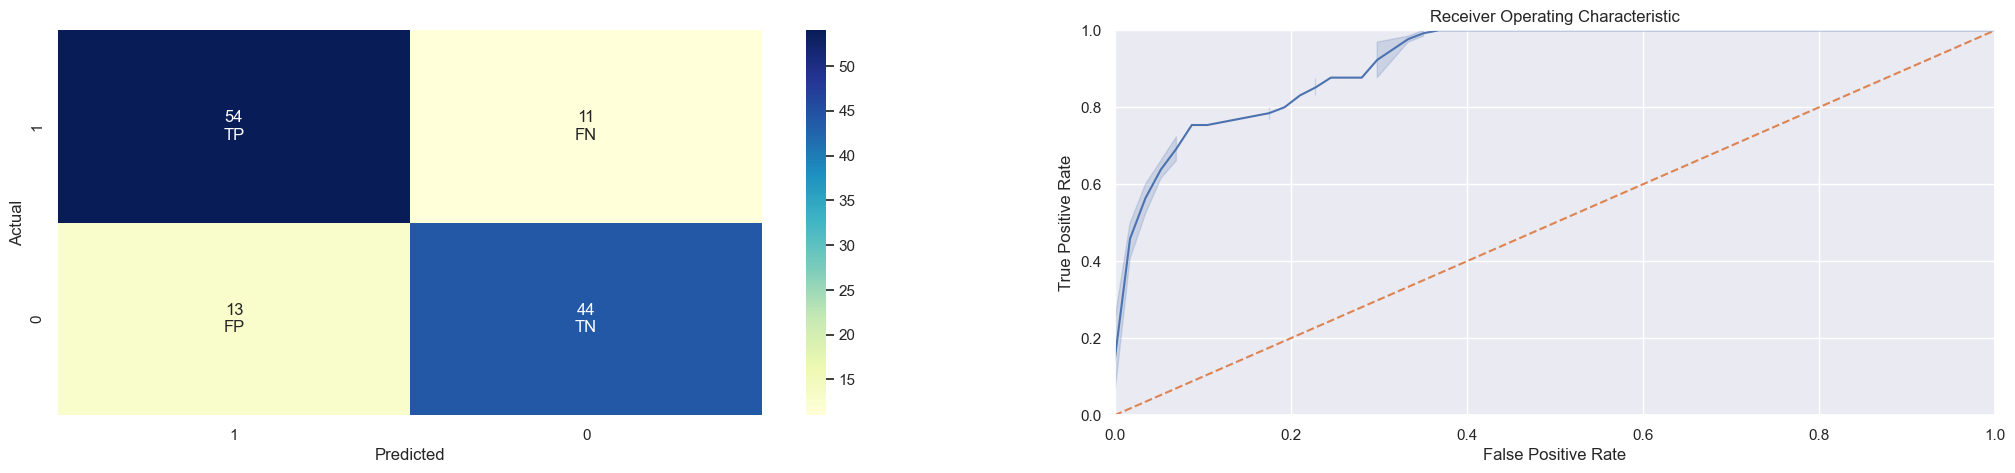

In [207]:
abc = AdaBoostClassifier(n_estimators = 10,learning_rate=1.0, random_state=None)
abc.fit(x_Train,y_Train)
accu=abc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
death_event_prediction("AdaBoostClassifier", abc,train_X,test_X,train_y,test_y, plot=True)


Accuracy: 0.5472131147540984
Area under the curve:  0.5
0.4672131147540984


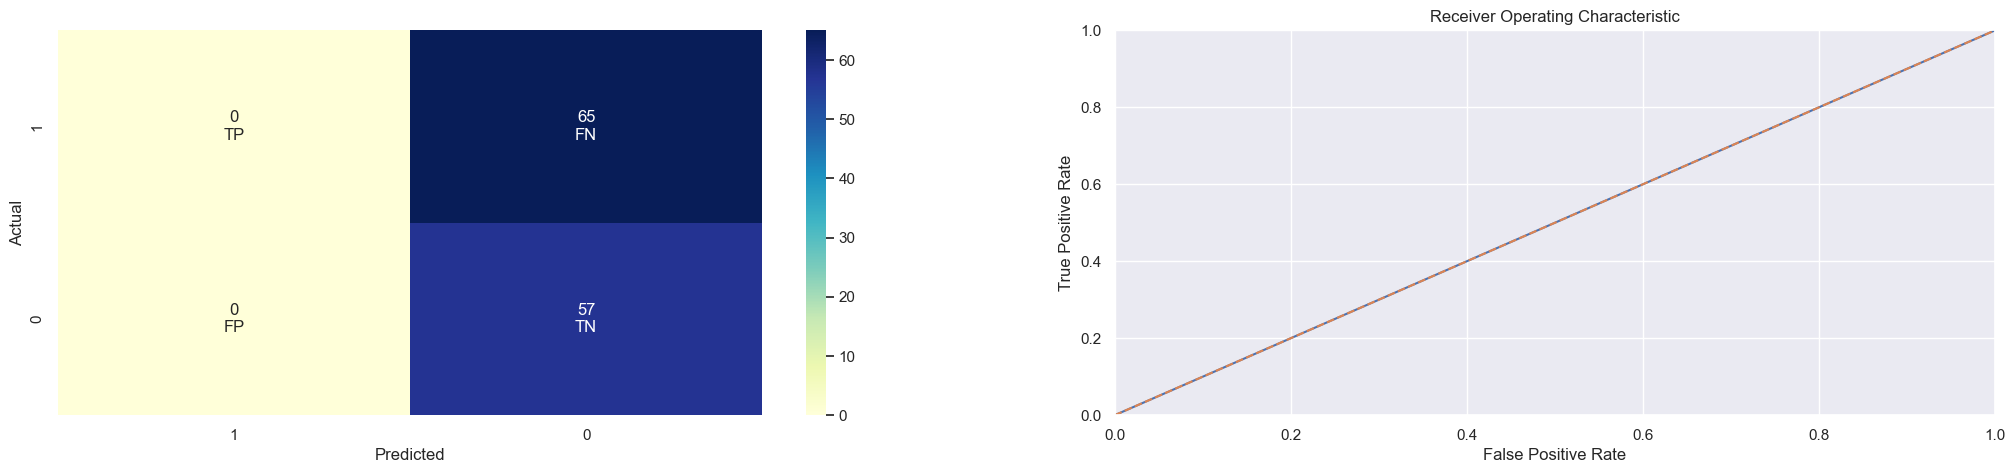

In [210]:
sgd = SGDClassifier(max_iter=100,tol=0,loss='hinge')
calibrated_sgd = CalibratedClassifierCV(sgd, cv=10,method='sigmoid')
sgd.fit(train_X,train_y)
accuracy = sgd.score(test_X, test_y)
print("Accuracy:", accuracy)
death_event_prediction("SGDClassifier",calibrated_sgd,train_X,test_X,train_y,test_y, plot=True)


Accuracy: 0.8872131147540984
Area under the curve:  0.8452091767881241
0.8442622950819673


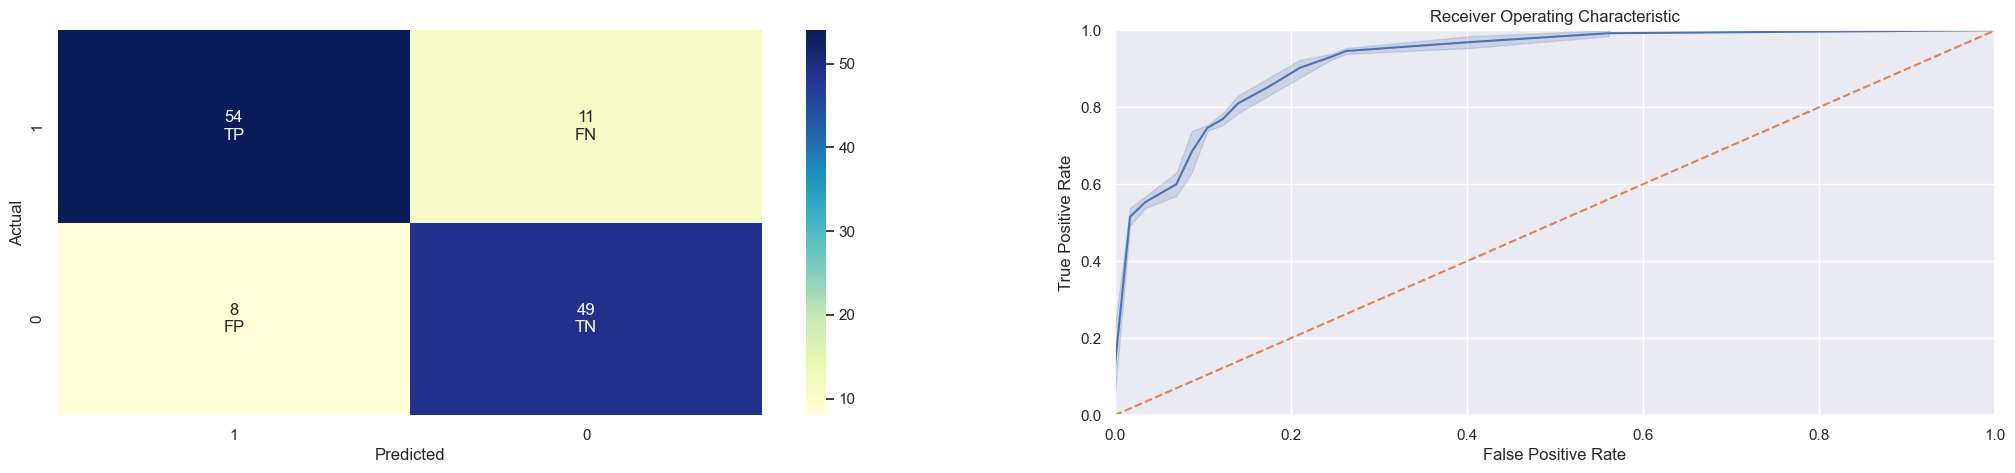

In [213]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100,max_features=12)

gbc.fit(x_Train,y_Train)
accu=gbc.score(x_Test,y_Test)
print("Accuracy:",accuracy)
death_event_prediction("GradientBoostingClassifier",gbc,train_X,test_X,train_y,test_y, plot=True)



Accuracy: 0.9180327868852459
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        57
           1       0.90      0.92      0.91        65

    accuracy                           0.90       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.90      0.90      0.90       122

Hi
Area under the curve:  0.9001349527665318
0.9016393442622951


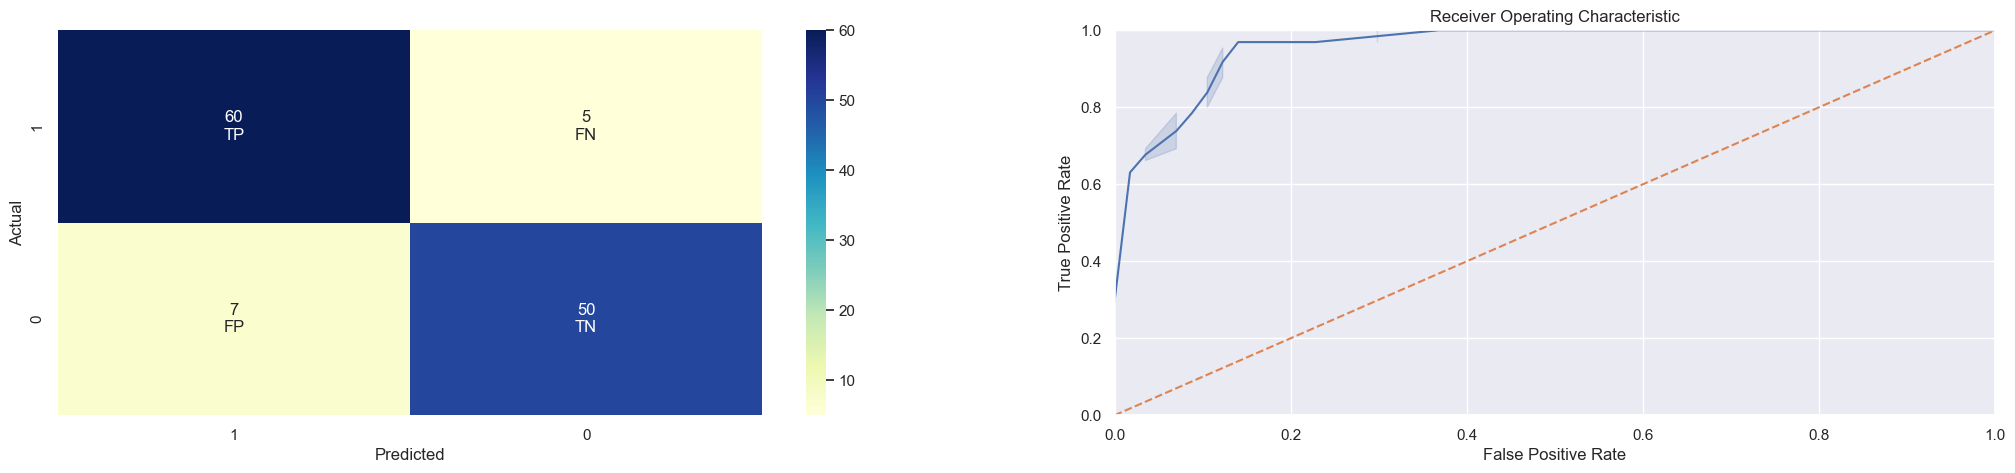

In [70]:
etc=ExtraTreesClassifier(n_estimators=150,criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt')



# Train the model on the training data
etc.fit(train_X, train_y)

# Use the trained model to make predictions on the test data
predictions = etc.predict(test_X)
accuracy = etc.score(test_X, test_y)
print("Accuracy:", accuracy)
death_event_prediction("ExtraTreesClassifier", etc, train_X, test_X, train_y, test_y, plot=True)


Accuracy: 0.7527868852459016
Area under the curve:  0.5
0.5327868852459017


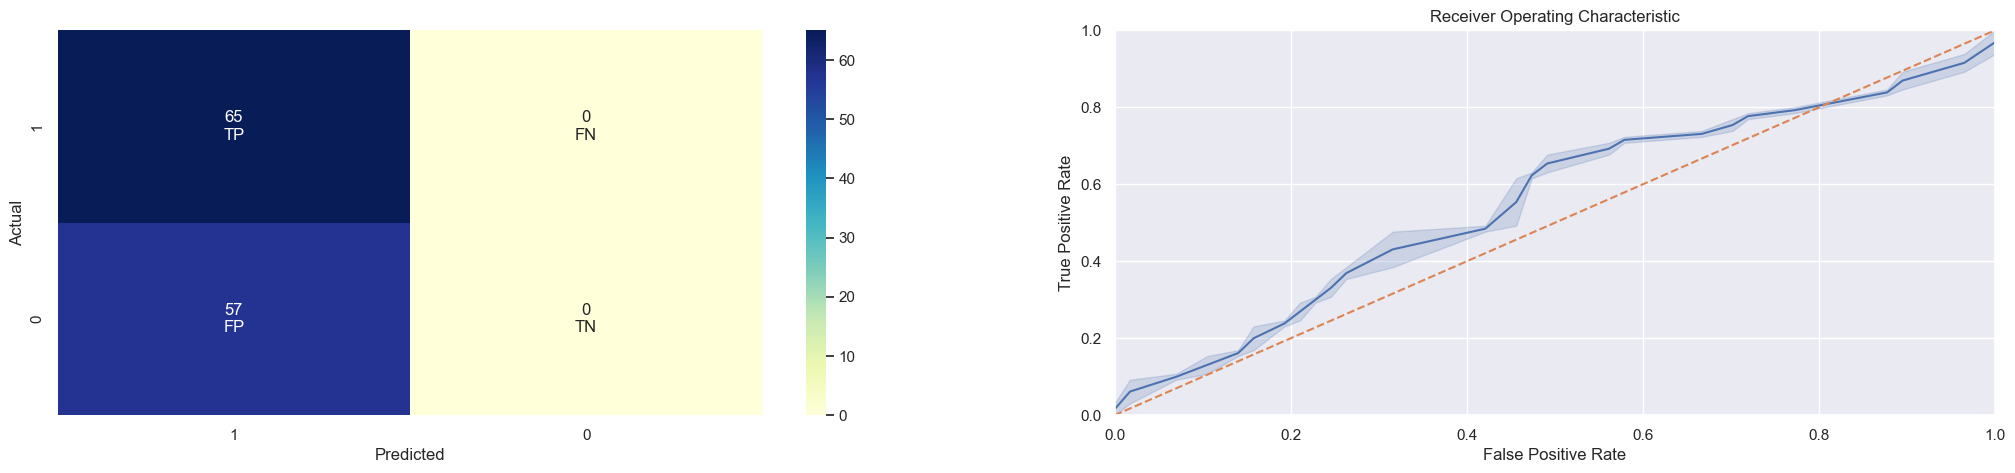

In [214]:
nb = GaussianNB(priors=[0.1, 0.9], var_smoothing=0.0001)
nb.partial_fit(train_X, train_y, np.unique(y))
accu=nb.score(test_X,test_y)
print("Accuracy:",accu)
death_event_prediction("NaiveBayes", nb, train_X, test_X, train_y, test_y, plot=True)

Accuracy: 0.7459016393442623
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        57
           1       0.80      0.85      0.82        65

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122

Hi
Area under the curve:  0.8002699055330634
0.8032786885245902


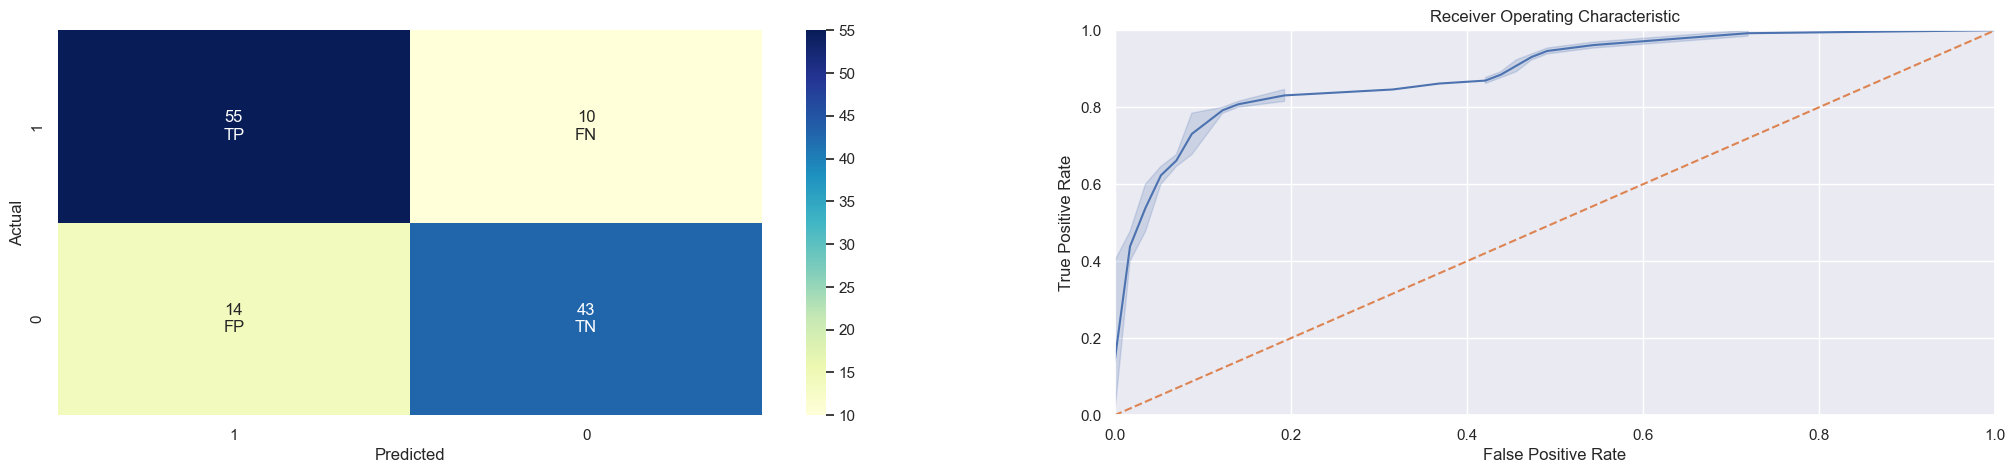

In [72]:
svc=SVC(C=1.0, kernel='linear', gamma='scale',probability=True)
svc.fit(x_Train,y_Train)
accu=svc.score(x_Test,y_Test)
print("Accuracy:",accu)
death_event_prediction("Support Vector Classifier", svc, train_X, test_X, train_y, test_y, plot=True)

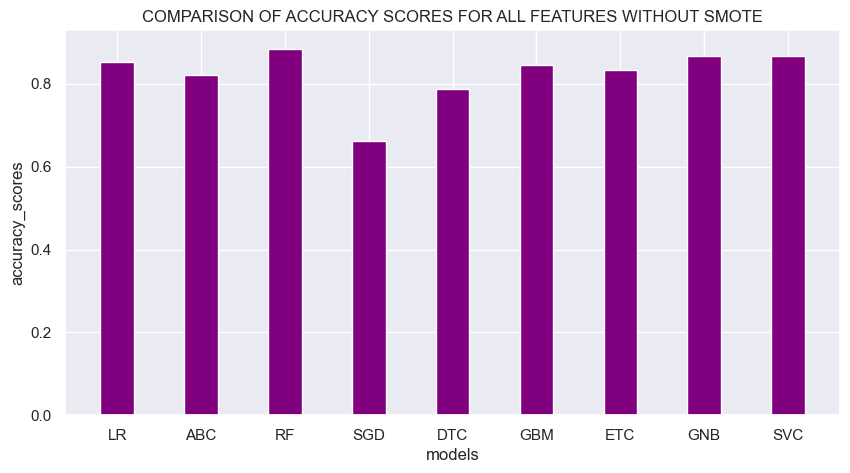

In [73]:
#MODEL COMPARISON FOR ALL FEATURES WITHOUT SMOTE

data={'LR':0.8532, 'ABC':0.8207, 'RF':0.8852, 'SGD' :0.6625, 'DTC' : 0.7868, 'GBM' :0.8460, 'ETC' : 0.8334, 'GNB' :0.8661, 'SVC' : 0.8666}

models=list(data.keys())

values=list(data.values())

fig=plt. figure (figsize=(10,5))

plt.bar (models, values, color='purple',
         width = 0.4)



plt.xlabel ("models")
plt.ylabel ("accuracy_scores")
plt.title ("COMPARISON OF ACCURACY SCORES FOR ALL FEATURES WITHOUT SMOTE")

plt.show()


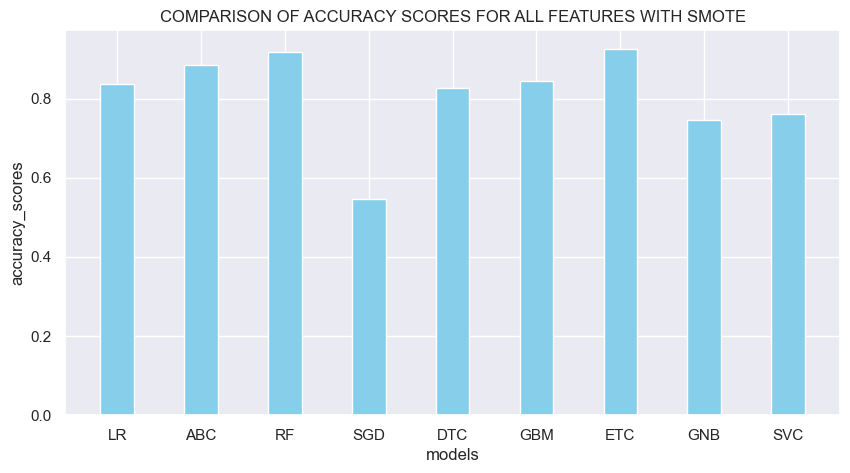

In [74]:
#MODEL COMPARISON FOR ALL FEATURES WITH SMOTE
data={'LR':0.8360, 'ABC': 0.8855, 'RF':0.9180, 'SGD':0.5470 , 'DTC':0.8278, 'GBM' : 0.8442, 'ETC' :0.9262, 'GNB' :0.7470, 'SVC' :0.7622}

models=list (data.keys())

values=list (data.values())

fig=plt.figure (figsize=(10,5))

plt.bar (models, values, color ='SKYBLUE',width = 0.4)

plt.xlabel ("models")
plt.ylabel ("accuracy_scores")

plt.title ("COMPARISON OF ACCURACY SCORES FOR ALL FEATURES WITH SMOTE")
plt.show()


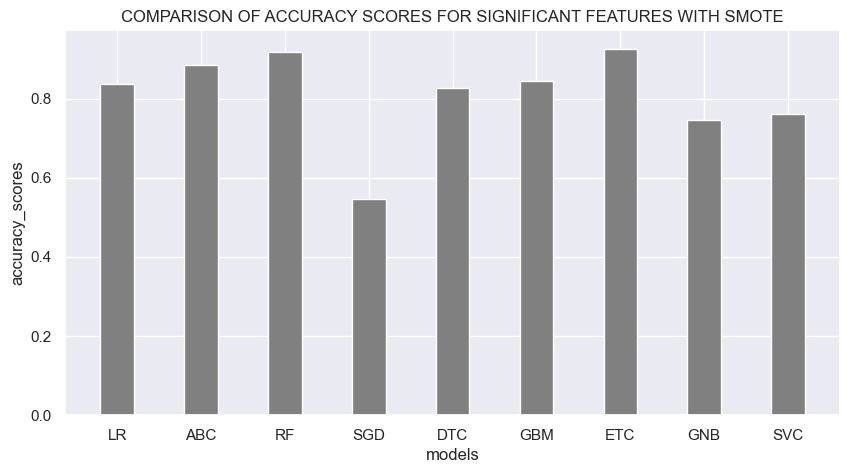

In [75]:
#MODEL COMPARISON FOR SIGNIFICANT FEATURES WITH SMOTE

data2={'LR':0.8440, 'ABC': 0.8852, 'RF':0.9188, 'SGD':0.5391 , 'DTC':0.8778, 'GBM' : 0.8852, 'ETC' :0.9262, 'GNB' :0.7540, 'SVC' :0.7622}

models=list (data.keys())

values=list (data.values())

fig=plt.figure(figsize=(10,5))

plt.bar (models, values, color ='GREY',width = 0.4)

plt.xlabel ("models")
plt.ylabel ("accuracy_scores")

plt.title ("COMPARISON OF ACCURACY SCORES FOR SIGNIFICANT FEATURES WITH SMOTE")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


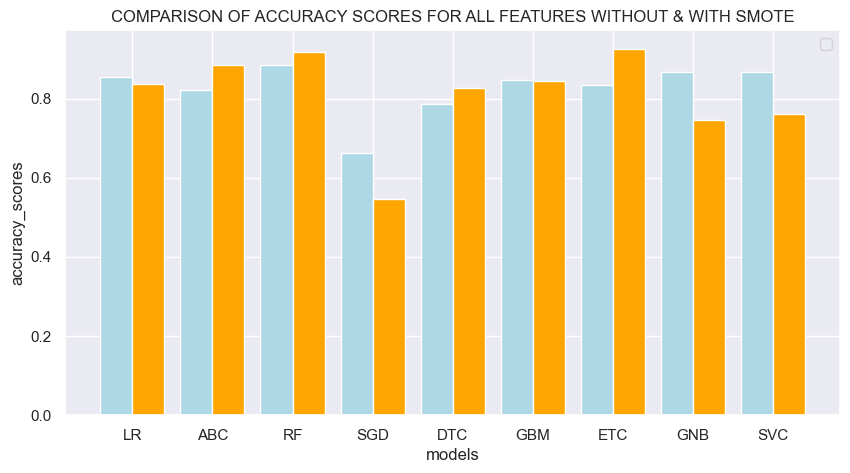

In [76]:
import warnings
warnings.filterwarnings('ignore')

data1={'LR':0.8532, 'ABC':0.8207, 'RF':0.8852, 'SGD' :0.6625, 'DTC' : 0.7868, 'GBM' :0.8460, 'ETC' : 0.8334, 'GNB' :0.8661, 'SVC' : 0.8666}
data2={'LR':0.8360, 'ABC': 0.8855, 'RF':0.9180, 'SGD':0.5470 , 'DTC':0.8278, 'GBM' : 0.8442, 'ETC' :0.9262, 'GNB' :0.7470, 'SVC' :0.7622}

models=list(data1.keys())
models1=list (data2.keys())

values=list(data1.values())
values1=list (data2.values())

fig=plt. figure (figsize=(10,5))
X_axis = np.arange(len(models))
plt.bar (X_axis-0.2,values,0.4 ,color='lightblue')
plt.bar(X_axis+0.2,values1,0.4,color='orange')


plt.xlabel ("models")
plt.ylabel ("accuracy_scores")
plt.xticks(X_axis, models)
plt.legend()
plt.title ("COMPARISON OF ACCURACY SCORES FOR ALL FEATURES WITHOUT & WITH SMOTE")

plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


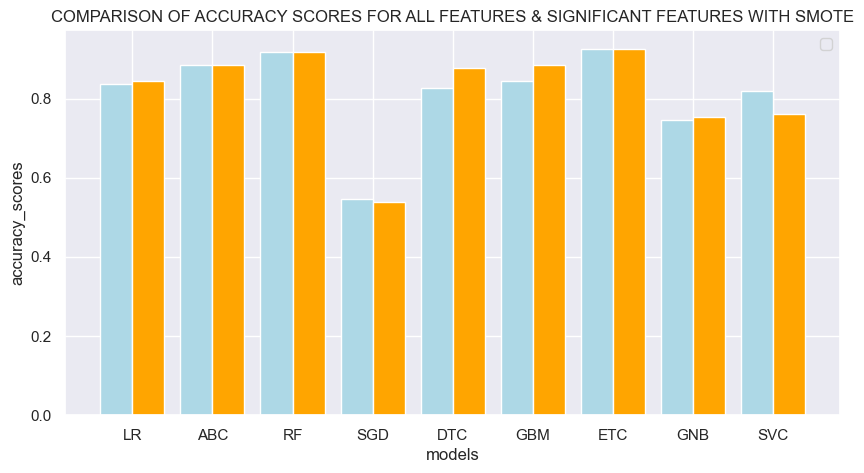

In [77]:

import warnings
warnings.filterwarnings('ignore')
data1={'LR':0.8360, 'ABC': 0.8855, 'RF':0.9180, 'SGD':0.5470 , 'DTC':0.8278, 'GBM' : 0.8442, 'ETC' :0.9262, 'GNB' :0.7470, 'SVC' :0.8196}
data2={'LR':0.8440, 'ABC': 0.8852, 'RF':0.9188, 'SGD':0.5391 , 'DTC':0.8778, 'GBM' : 0.8852, 'ETC' :0.9262, 'GNB' :0.7540, 'SVC' :0.7622}

models=list(data1.keys())
models1=list (data2.keys())
values=list(data1.values())
values1=list (data2.values())
fig=plt. figure (figsize=(10,5))
X_axis = np.arange(len(models))
plt.bar (X_axis-0.2,values,0.4 ,color='lightblue')
plt.bar(X_axis+0.2,values1,0.4,color='orange')
plt.xlabel ("models")
plt.ylabel ("accuracy_scores")
plt.xticks(X_axis, models)
plt.legend()
plt.title ("COMPARISON OF ACCURACY SCORES FOR ALL FEATURES & SIGNIFICANT FEATURES WITH SMOTE")
plt.show()
